In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import entropia

In [2]:
print(pd.__version__)

1.4.4


In [3]:
carpeta="data/training_textos_hipotesis_salida/"

## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
print(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

data/training_textos_hipotesis_salida/entropia/resultados_entropiaZSCORE_Transponse.pickle


In [6]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [7]:
dfn

Docs  grupo      muestreo  \
0     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
1     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
2     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
3     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
4     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
...                                                 ...    ...           ...   
2173  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2174  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2175  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2176  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2177  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   

      Total  Subtotal                          E_P  \
0       110        95        entailment_entailment   
1       110        15           entailment_neutral   
2       110         0     entailment_contradiction   
3       131        18           neutral_entailment   
4       131        98              neutral_neutral   
...     ...       ...                          ...   
2173   2566      1975              neutral_neutral   
2174   2566       297        neutral_contradiction   
2175   2440       131     contradiction_entailment   
2176   2440       291        contradiction_neutral   
2177   2440      2018  contradiction_contradiction   

                                               entropia  Paraphrase  
0     [6.896, 5.585, 5.707, 5.759, 5.17, 6.965, 5.32...           0  
1     [5.807, 5.129, 5.469, 6.044, 6.755, 6.916, 6.1...           0  
2                                                    []           0  
3     [7.633, 6.17, 6.359, 5.75, 4.322, 5.794, 6.085...           0  
4     [4.522, 6.976, 8.098, 7.564, 8.054, 6.306, 5.6...           0  
...                                                 ...         ...  
2173  [5.468, 6.724, 5.585, 6.766, 7.233, 4.725, 5.9...           1  
2174  [6.059, 7.241, 6.642, 6.828, 5.107, 4.844, 6.4...           1  
2175  [6.574, 5.755, 6.344, 6.777, 5.129, 6.385, 6.5...           1  
2176  [6.52, 6.347, 5.91, 5.755, 5.491, 6.596, 5.884...           1  
2177  [6.948, 5.74, 5.807, 5.907, 5.533, 5.807, 6.59...           1  

[2178 rows x 8 columns]

In [8]:
dfn=dfn.assign(relacion=dfn["Subtotal"]/dfn["Total"])
dfn

Docs  grupo      muestreo  \
0     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
1     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
2     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
3     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
4     data/training_textos_hipotesis_salida\pTEST_ne...    5.0  0.csv.pickle   
...                                                 ...    ...           ...   
2173  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2174  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2175  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2176  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   
2177  data/training_textos_hipotesis_salida\pTEST_ne...  100.0  0.csv.pickle   

      Total  Subtotal                          E_P  \
0       110        95        entailment_entailment   
1       110        15           entailment_neutral   
2       110         0     entailment_contradiction   
3       131        18           neutral_entailment   
4       131        98              neutral_neutral   
...     ...       ...                          ...   
2173   2566      1975              neutral_neutral   
2174   2566       297        neutral_contradiction   
2175   2440       131     contradiction_entailment   
2176   2440       291        contradiction_neutral   
2177   2440      2018  contradiction_contradiction   

                                               entropia  Paraphrase  relacion  
0     [6.896, 5.585, 5.707, 5.759, 5.17, 6.965, 5.32...           0  0.863636  
1     [5.807, 5.129, 5.469, 6.044, 6.755, 6.916, 6.1...           0  0.136364  
2                                                    []           0  0.000000  
3     [7.633, 6.17, 6.359, 5.75, 4.322, 5.794, 6.085...           0  0.137405  
4     [4.522, 6.976, 8.098, 7.564, 8.054, 6.306, 5.6...           0  0.748092  
...                                                 ...         ...       ...  
2173  [5.468, 6.724, 5.585, 6.766, 7.233, 4.725, 5.9...           1  0.769680  
2174  [6.059, 7.241, 6.642, 6.828, 5.107, 4.844, 6.4...           1  0.115744  
2175  [6.574, 5.755, 6.344, 6.777, 5.129, 6.385, 6.5...           1  0.053689  
2176  [6.52, 6.347, 5.91, 5.755, 5.491, 6.596, 5.884...           1  0.119262  
2177  [6.948, 5.74, 5.807, 5.907, 5.533, 5.807, 6.59...           1  0.827049  

[2178 rows x 9 columns]

In [9]:
etiquetas=['entailment','neutral','contradiction']

In [10]:
dfn_sinparafraseo=dfn[dfn["Paraphrase"]==0]
dfn_conparafraseo=dfn[dfn["Paraphrase"]==1]

# Vamos a dibujar la relación de aciertos (grupal) y errores

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

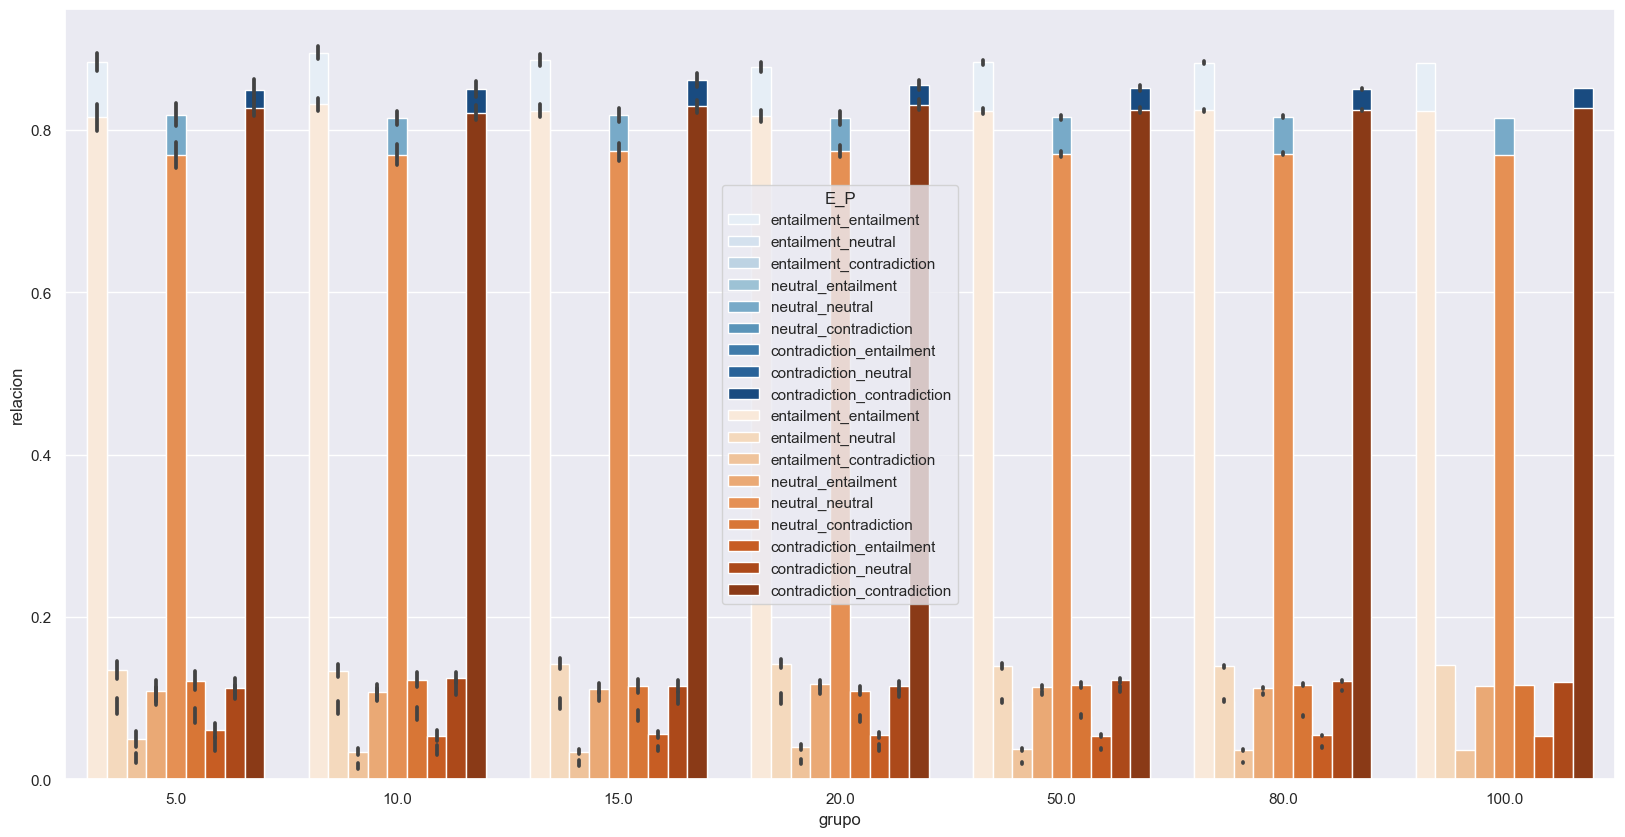

In [11]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_sinparafraseo,x="grupo",y="relacion", hue="E_P",palette="Blues")
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P",palette="Oranges")

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

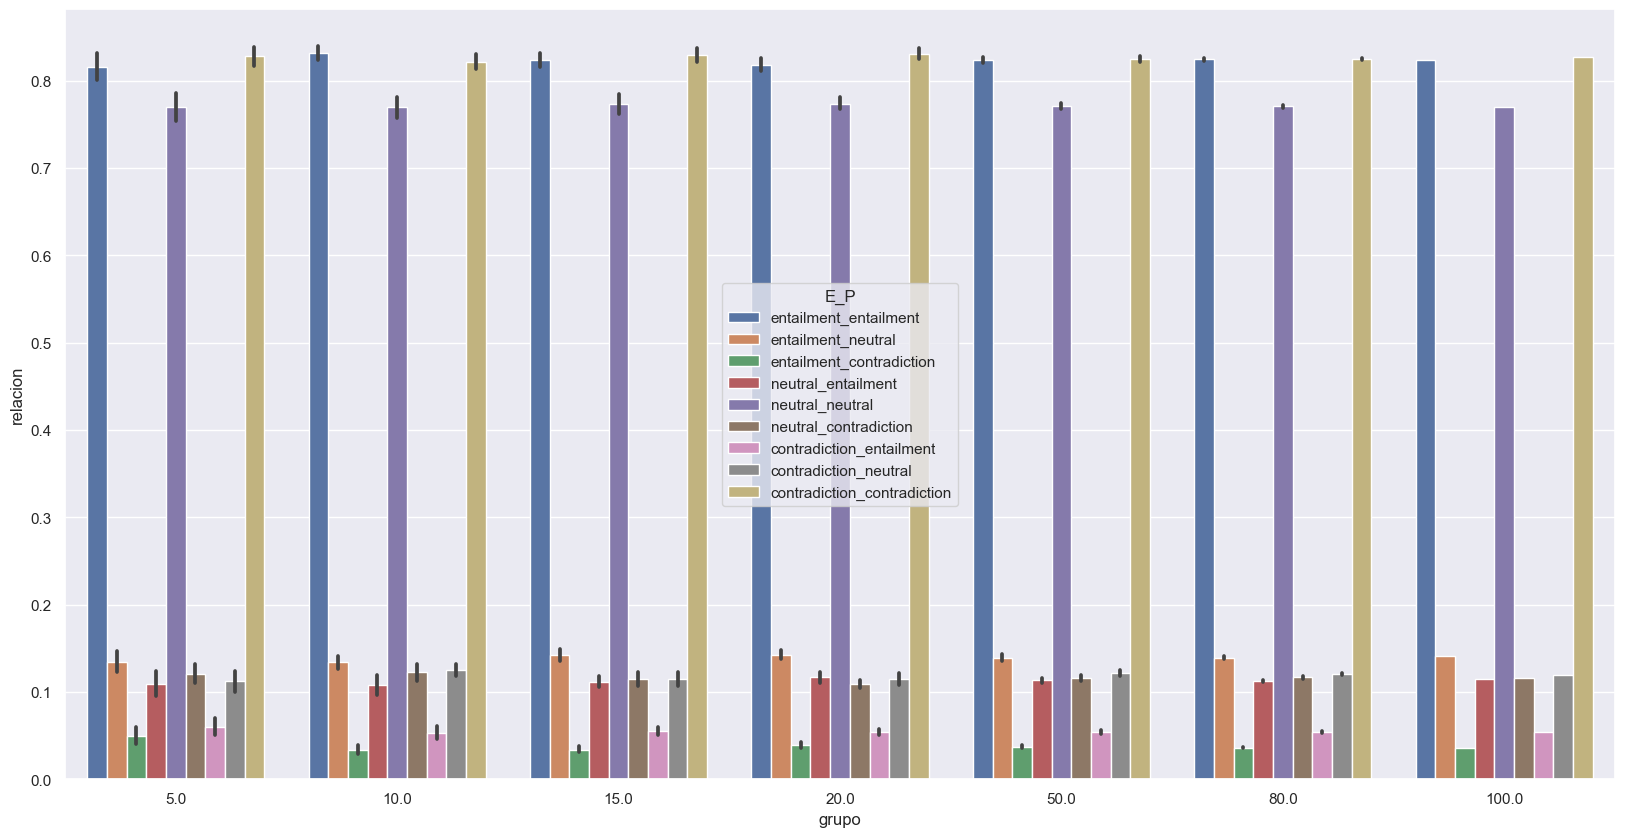

In [12]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P")

## Los anteriores resultados muestran que en cada muestreo hay una gran diferencia de los aciertos vs los errores un promedio de 80 % para los casos de entailment_entailment, neutral_neutral y contradiction_contradiction.

## Por otro lado, existe un porcentaje alto (relativamente) de los X_neutral, es decir que a partir del texto no se logré decidir si es entailment o contradiction. 18% promedio de errores cuando en realidad es entailment y predice neutralidad y 12% promedio cuando debería ser contradiction. lo mismo ocurre cuando es neutralidad y predice entailment o contradiction con 10% cada uno. Y en los ultimos casos donde se parte de un entailment y predice una contradiction con un 5% y que con un target contradiction lleva a una prediccion de entailment con 5%.

##


In [13]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Matriz de alineamiento
# Procesar todos los archivos p*.pickle para agregar columnas que obtengan los POS que tienen más que un umbral

In [14]:
muestreos=['0.05','0.1','0.15','0.2','0.5','0.8','1']

In [15]:
#POS donde encuentra coincidencia
#pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ','PART','PRON','X','CCONJ','PUNCT','INTJ','SYM']

In [15]:
pos=['NOUN','VERB','ADP','ADV','ADJ']

In [16]:
# De acuerdo al análisis estadístico se obtiene que el umbral es de 0.5
umbral=0.5

In [17]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'minimo':[],'maximo':[],'3quartile':[]}
for g in muestreos:
    a=glob.glob(carpeta+'p*_'+g+'_*.pickle')
    for e in a:
        min_max=[]
        temp=pd.read_pickle(e)
        df=temp.copy()
        temp=temp.assign(ma_umbral="")
        for indice,strings in df.iterrows():
            t=strings['Text']
            h=strings['Hipotesis']
            matriz=strings['M_Align']
            matriz_c=matriz[1:len(t)-1,1:len(h)-1]
            min_max.extend(matriz_c.flatten())
            # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
            if(len(t[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
            elif(len(h[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
            else:
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
            c_a=p1_df1.columns
            data=pd.DataFrame("",columns=pos,index=pos)
            for i,strings2 in p1_df1.iterrows():
                for j in range(len(c_a)):
                    if(strings2[j]>umbral):
                        if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
                            data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
            temp.at[indice,'ma_umbral']=data
            temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        temp.to_pickle(e)
        new_data['Docs'].append(e)
        new_data['grupo'].append(g)
        new_data['datos'].append(min_max[:])
        new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
        new_data['minimo'].append(np.min(np.asarray(min_max)))
        new_data['maximo'].append(np.max(np.asarray(min_max)))
        min_max.clear()
df_resume=pd.DataFrame(new_data)
df_resume.to_pickle(carpeta+"align/data_POS_ALIGN.pickle")

# Identificación de umbral de alineamiento para obtener el 60% de los valores mayores al umbral

In [20]:
df=pd.read_pickle(carpeta+"align/data_POS_ALIGN.pickle")

In [21]:
df

Docs grupo  \
0    data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
1    data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
2    data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
3    data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
4    data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
..                                                 ...   ...   
116  data/training_textos_hipotesis_salida\pTEST_ne...   0.8   
117  data/training_textos_hipotesis_salida\pTEST_ne...   0.8   
118  data/training_textos_hipotesis_salida\pTEST_ne...   0.8   
119  data/training_textos_hipotesis_salida\pTEST_ne...   0.8   
120  data/training_textos_hipotesis_salida\pTEST_ne...     1   

                                                 datos  minimo    maximo  \
0    [0.02611161, 0.047737908, 0.016249994, 0.07060...     0.0  8.701317   
1    [0.02611161, 0.03230063, 0.0013745114, 0.00519...     0.0  8.015791   
2    [0.58782685, 0.6758172, 0.026913851, 0.1823916...     0.0  8.545439   
3    [0.02611161, 0.045506727, 0.00178038, 0.032530...     0.0  9.173684   
4    [0.02611161, 0.045506727, 0.014831392, 0.06760...     0.0  8.701317   
..                                                 ...     ...       ...   
116  [0.02611161, 0.0, 0.014831392, 0.01571394, 0.0...     0.0  9.173684   
117  [0.02611161, 0.0376068, 0.014831392, 0.0683768...     0.0  9.173684   
118  [0.0026690778, 0.06463472, 0.014831392, 0.0303...     0.0  9.173684   
119  [0.0, 0.810434, 0.044186324, 0.066426985, 0.0,...     0.0  9.173684   
120  [0.0026690778, 0.045506727, 0.014831392, 0.0, ...     0.0  9.173684   

     3quartile  
0     0.442490  
1     0.492843  
2     0.452659  
3     0.445170  
4     0.462454  
..         ...  
116   0.462907  
117   0.463446  
118   0.466548  
119   0.462907  
120   0.463992  

[121 rows x 6 columns]

In [22]:
umbral=df['3quartile'].mean()
umbral

0.4636077347003724

In [23]:
data = df['datos'][0]
data.sort()
len(data)

76581

In [24]:
#Vamos a eliminar los ceros
nueva_data=[]
for e in data:
    if e!=0.0:
        nueva_data.append(e)
print(len(nueva_data))

74724


In [25]:
#Como ya esta ordenado nos vamos a quedar con el 40% de los datos y el ultimo será el umbral
nd=nueva_data[:round(len(nueva_data)*0.5)]
nd[-1]

0.073443204

In [26]:
np.median(nueva_data)

0.073443204

In [27]:
print(np.quantile(nueva_data,q=0.25))
print(np.quantile(nueva_data,q=0.5))
print(np.quantile(nueva_data,q=0.75))
print(np.quantile(nueva_data,q=1))

0.018772633746266365
0.073443204164505
0.4568233788013458
8.701317


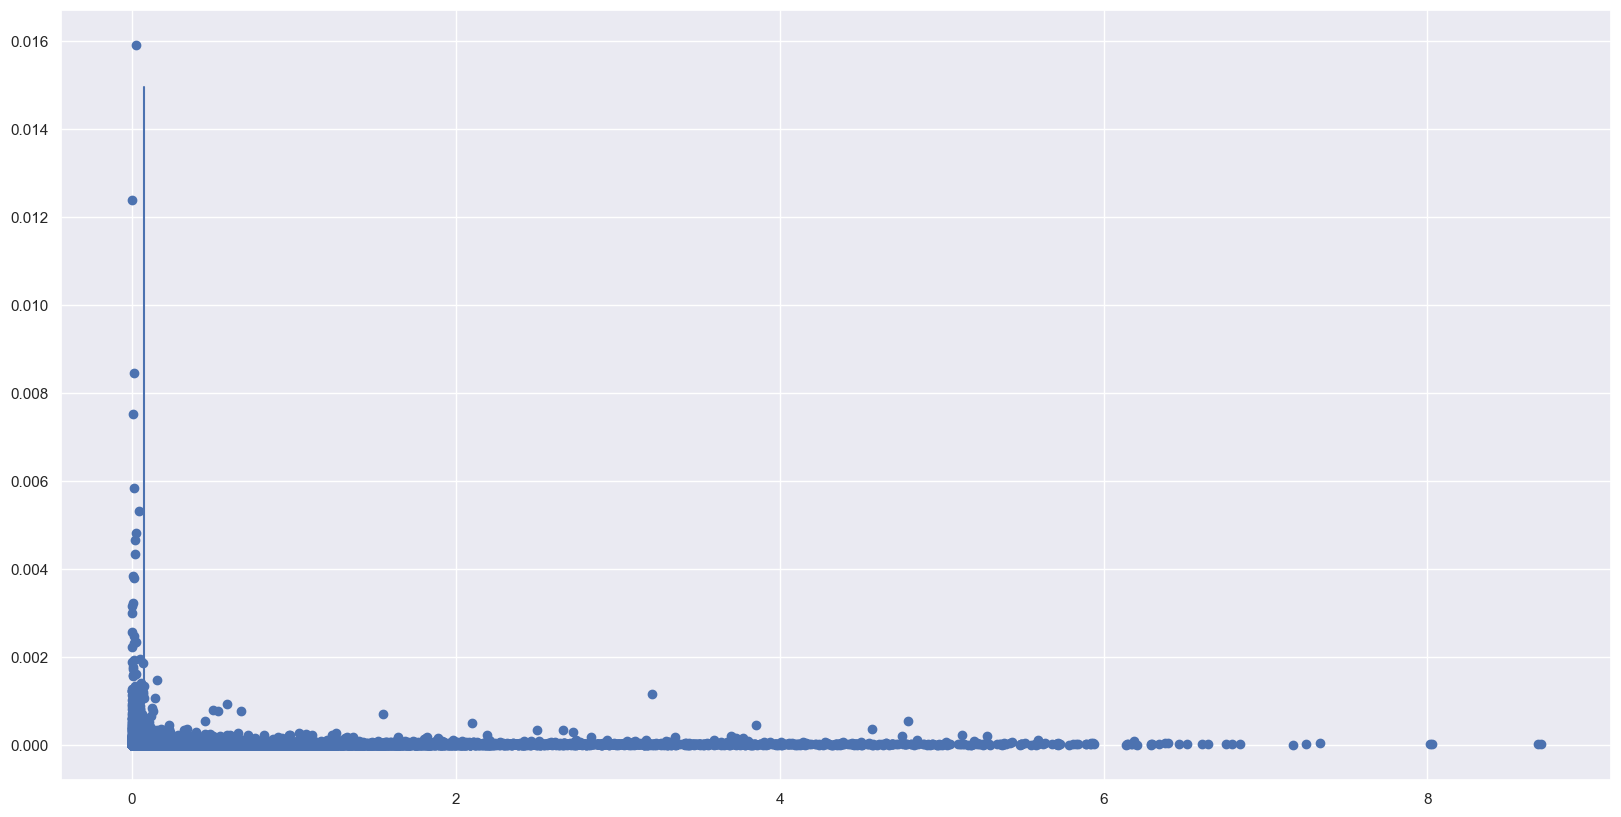

In [28]:
# Vamos a dibujar el umbral y la distribución de los datos
min_d=min(nueva_data)
max_d=max(nueva_data)
tamanio=len(nueva_data)
unicos = list(set(nueva_data))
y = [ nueva_data.count(x)/tamanio for x in unicos]
fig, ax = plt.subplots()
ax.scatter(x = unicos, y = y)
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9)
plt.show() #dibujamos el histograma

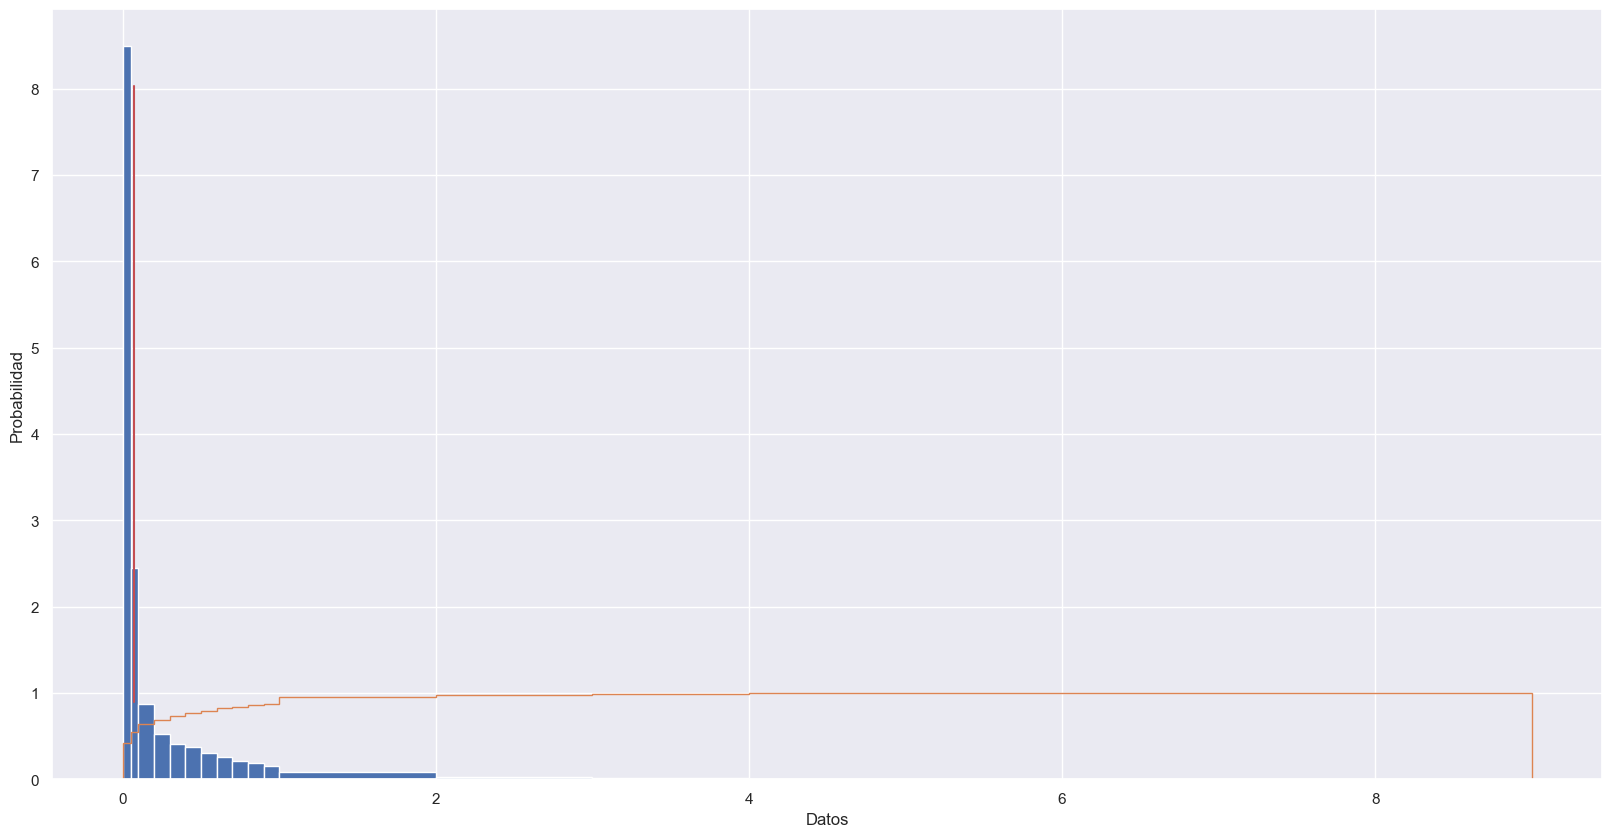

In [29]:
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True)
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True, cumulative=True, label='CDF', histtype='step')
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9, color = "r")   
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show() 

# De acuerdo al umbral obtener pares de palabras del texto y la hipótesis mayores a este (1)

In [30]:
muestreos

['0.05', '0.1', '0.15', '0.2', '0.5', '0.8', '1']

In [31]:
a=glob.glob(carpeta+'p*_'+muestreos[1]+'_*.pickle')
a

['data/training_textos_hipotesis_salida\\pTEST_new_0.1_0.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_1.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_10.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_11.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_12.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_13.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_14.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_15.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_16.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_17.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_18.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_19.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_2.csv.pickle',
 'data/training_textos_hipotesis_salida\\pTEST_new_0.1_3.csv.pickle',
 'data/tra

In [32]:
dfm=pd.read_pickle(a[0])
dfm

Main index                                               Text  \
0              0  [NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...   
1              1  [NULL{null,PROPN}, a{a,DET}, person{person,NOU...   
2              2  [NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...   
3              3  [NULL{null,PROPN}, the{the,DET}, big{big,ADJ},...   
4              4  [NULL{null,PROPN}, a{a,DET}, historic{historic...   
...          ...                                                ...   
1453        1453  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...   
1454        1454  [NULL{null,PROPN}, a{a,DET}, bearded{bearded,A...   
1455        1455  [NULL{null,ADJ}, cheerleaders{cheerleader,NOUN...   
1456        1456  [NULL{null,ADJ}, man{man,NOUN}, on{on,ADP}, bi...   
1457        1457  [NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...   

                                              Hipotesis  \
0     [NULL{null,PROPN}, the{the,DET}, country{count...   
1     [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...   
2     [NULL{null,PROPN}, the{the,DET}, women{woman,N...   
3     [NULL{null,PROPN}, a{a,DET}, mother{mother,NOU...   
4     [NULL{null,PROPN}, the{the,DET}, newly{newly,A...   
...                                                 ...   
1453  [NULL{null,ADJ}, two{two,NUM}, wearing{wear,VE...   
1454  [NULL{null,PROPN}, someone{someone,NOUN}, is{b...   
1455  [NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...   
1456  [NULL{null,ADJ}, two{two,NUM}, people{people,N...   
1457  [NULL{null,ADJ}, two{two,NUM}, prepare{prepare...   

                                                 R_Text  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1453  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1454  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1455  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1456  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1457  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                  R_Hip  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1453  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1454  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1455  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1456  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1457  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                M_Align  \
0     [[0.085589595, 0.004343943, 0.11389358, 0.1410...   
1     [[0.085589595, 0.014024382, 0.1707767, 0.01616...   
2     [[0.085589595, 0.004343943, 0.21101676, 0.0111...   
3     [[0.085589595, 0.014024382, 0.21889143, 0.3574...   
4     [[0.085589595, 0.004343943, 0.04171864, 0.1344...   
...                                                 ...   
1453  [[0.085589595, 0.08687423, 0.12925966, 0.10843...   
1454  [[0.085589595, 0.19364926, 0.016168319, 0.1648...   
1455  [[0.085589595, 0.08687423, 0.21120092, 0.23552...   
1456  [[0.085589595, 0.08687423, 0.16620766, 0.11374...   
1457  [[0.085589595, 0.08687423, 0.1189547, 0.241379...   

                                    Prediction       Gold_label  Paraphrase  \
0           [0.6313323, 0.2246649, 0.14400278]  [1.0, 0.0, 0.0]           0   
1         [0.4927821, 0.49724737, 0.009970519]  [0.0, 1.0, 0.0]           0   
2          [0.6881419, 0.05410992, 0.25774816]  [0.0, 0.0, 1.0]           0   
3

In [33]:
dfm['ma_umbral'][1]

NOUN VERB ADP                    ADV ADJ
NOUN  ,2.7393045           ,0.94176453,1.8889532    
VERB                                 ,0.75212175    
ADP                                   ,1.1802294    
ADV                                                 
ADJ                                    ,3.000191

In [34]:
dfm

Main index                                               Text  \
0              0  [NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...   
1              1  [NULL{null,PROPN}, a{a,DET}, person{person,NOU...   
2              2  [NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...   
3              3  [NULL{null,PROPN}, the{the,DET}, big{big,ADJ},...   
4              4  [NULL{null,PROPN}, a{a,DET}, historic{historic...   
...          ...                                                ...   
1453        1453  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...   
1454        1454  [NULL{null,PROPN}, a{a,DET}, bearded{bearded,A...   
1455        1455  [NULL{null,ADJ}, cheerleaders{cheerleader,NOUN...   
1456        1456  [NULL{null,ADJ}, man{man,NOUN}, on{on,ADP}, bi...   
1457        1457  [NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...   

                                              Hipotesis  \
0     [NULL{null,PROPN}, the{the,DET}, country{count...   
1     [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...   
2     [NULL{null,PROPN}, the{the,DET}, women{woman,N...   
3     [NULL{null,PROPN}, a{a,DET}, mother{mother,NOU...   
4     [NULL{null,PROPN}, the{the,DET}, newly{newly,A...   
...                                                 ...   
1453  [NULL{null,ADJ}, two{two,NUM}, wearing{wear,VE...   
1454  [NULL{null,PROPN}, someone{someone,NOUN}, is{b...   
1455  [NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...   
1456  [NULL{null,ADJ}, two{two,NUM}, people{people,N...   
1457  [NULL{null,ADJ}, two{two,NUM}, prepare{prepare...   

                                                 R_Text  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1453  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1454  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1455  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1456  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1457  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                  R_Hip  \
0     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
2     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
3     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
4     [[0.016082555, 0.077160776, -0.013421837, 0.00...   
...                                                 ...   
1453  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1454  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1455  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1456  [[0.016082555, 0.077160776, -0.013421837, 0.00...   
1457  [[0.016082555, 0.077160776, -0.013421837, 0.00...   

                                                M_Align  \
0     [[0.085589595, 0.004343943, 0.11389358, 0.1410...   
1     [[0.085589595, 0.014024382, 0.1707767, 0.01616...   
2     [[0.085589595, 0.004343943, 0.21101676, 0.0111...   
3     [[0.085589595, 0.014024382, 0.21889143, 0.3574...   
4     [[0.085589595, 0.004343943, 0.04171864, 0.1344...   
...                                                 ...   
1453  [[0.085589595, 0.08687423, 0.12925966, 0.10843...   
1454  [[0.085589595, 0.19364926, 0.016168319, 0.1648...   
1455  [[0.085589595, 0.08687423, 0.21120092, 0.23552...   
1456  [[0.085589595, 0.08687423, 0.16620766, 0.11374...   
1457  [[0.085589595, 0.08687423, 0.1189547, 0.241379...   

                                    Prediction       Gold_label  Paraphrase  \
0           [0.6313323, 0.2246649, 0.14400278]  [1.0, 0.0, 0.0]           0   
1         [0.4927821, 0.49724737, 0.009970519]  [0.0, 1.0, 0.0]           0   
2          [0.6881419, 0.05410992, 0.25774816]  [0.0, 0.0, 1.0]           0   
3

In [35]:
tp=dfm['target_prediction'].unique()

In [36]:
len(tp)

9

In [37]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [38]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
for gp in muestreos:
    a=glob.glob(carpeta+'p*_'+gp+'_*.pickle')
    for e in a:
        print(e)
        temp=pd.read_pickle(e)
        for f in labels:
            #obtener la matriz de alineamiento
            for pf in [0,1]:
                #vamos a filtrar por target prediction
                data={}
                temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
                for index2,strings2 in temp2.iterrows():
                    dt=strings2['ma_umbral']
                    columnas3=dt.columns
                    for index3,strings3 in dt.iterrows():
                        for c in columnas3:
                            num=strings3[c].split(',')
                            if(len(num)>1):
                                if(index3+"_"+c in data):
                                    g=data[index3+"_"+c]
                                    #print(g,index3+"_"+c)
                                    data[index3+"_"+c]= g+num[1:]
                                    #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
                                elif(c+"_"+index3 in data):
                                    g=data[c+"_"+index3]
                                    #print(g,index3+"_"+c)
                                    data[c+"_"+index3]= g+num[1:]
                                else:
                                    #print("entra:",index3+"_"+c,num[1:])
                                    data[index3+"_"+c]=num[1:]
                new_data['Docs'].append(e)
                new_data['grupo'].append(gp)
                new_data['datos'].append(data)
                new_data['etiqueta'].append(f)
                new_data['paraphrase'].append(pf)
data_boxplot=pd.DataFrame(new_data)
data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

data/training_textos_hipotesis_salida\pTEST_new_0.05_0.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_1.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_10.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_11.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_12.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_13.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_14.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_15.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_16.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_17.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_18.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_19.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_2.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_3.csv.pickle
data/training_textos_hipotesis_salida\pTEST_new_0.05_4.csv.pickle


In [ ]:
# Se obtuvieron dos dataframe finales 
# 1) data_POS_ALIGN_T_H.pickle que toma en cuenta la dirección de la alineación de un archivo de un muestreo, por target_prediction 
# es decir NOUN_ADJ es NOUN (Texto) y ADJ (hipótesis) que es diferente de ADJ_NOUN: ADJ (Texto) y NOUN (hipótesis)
# 2) data_POS_ALIGN.pickle no toma en cuenta la dirección de la alineación si no solo el tipo de palabras que se vinculan
# no importa en donde este Texto o Hipótesis

In [39]:
data_boxplot=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [40]:
data_boxplot

Docs grupo  \
0     data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
1     data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
2     data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
3     data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
4     data/training_textos_hipotesis_salida\pTEST_ne...  0.05   
...                                                 ...   ...   
2173  data/training_textos_hipotesis_salida\pTEST_ne...     1   
2174  data/training_textos_hipotesis_salida\pTEST_ne...     1   
2175  data/training_textos_hipotesis_salida\pTEST_ne...     1   
2176  data/training_textos_hipotesis_salida\pTEST_ne...     1   
2177  data/training_textos_hipotesis_salida\pTEST_ne...     1   

                                                  datos  \
0     {'NOUN_NOUN': ['1.3034014', '2.2022123', '0.77...   
1     {'NOUN_NOUN': ['5.517257', '1.5078784', '1.265...   
2     {'NOUN_NOUN': ['0.6335128', '0.68890876', '1.3...   
3     {'NOUN_NOUN': ['1.1765908', '1.8482348', '0.60...   
4                                                    {}   
...                                                 ...   
2173  {'NOUN_NOUN': ['3.258878', '0.5455615', '2.991...   
2174  {'NOUN_NOUN': ['3.2146893', '0.74616504', '0.5...   
2175  {'NOUN_NOUN': ['1.2686363', '0.55548716', '2.1...   
2176  {'NOUN_NOUN': ['1.3301198', '2.1025875', '2.76...   
2177  {'NOUN_NOUN': ['2.1669703', '1.1981556', '1.26...   

                         etiqueta  paraphrase  
0           entailment_entailment           0  
1           entailment_entailment           1  
2              entailment_neutral           0  
3              entailment_neutral           1  
4        entailment_contradiction           0  
...                           ...         ...  
2173     contradiction_entailment           1  
2174        contradiction_neutral           0  
2175        contradiction_neutral           1  
2176  contradiction_contradiction           0  
2177  contradiction_contradiction           1  

[2178 rows x 5 columns]

In [41]:
dict0=data_boxplot['datos'][0]
dict1=data_boxplot['datos'][1]

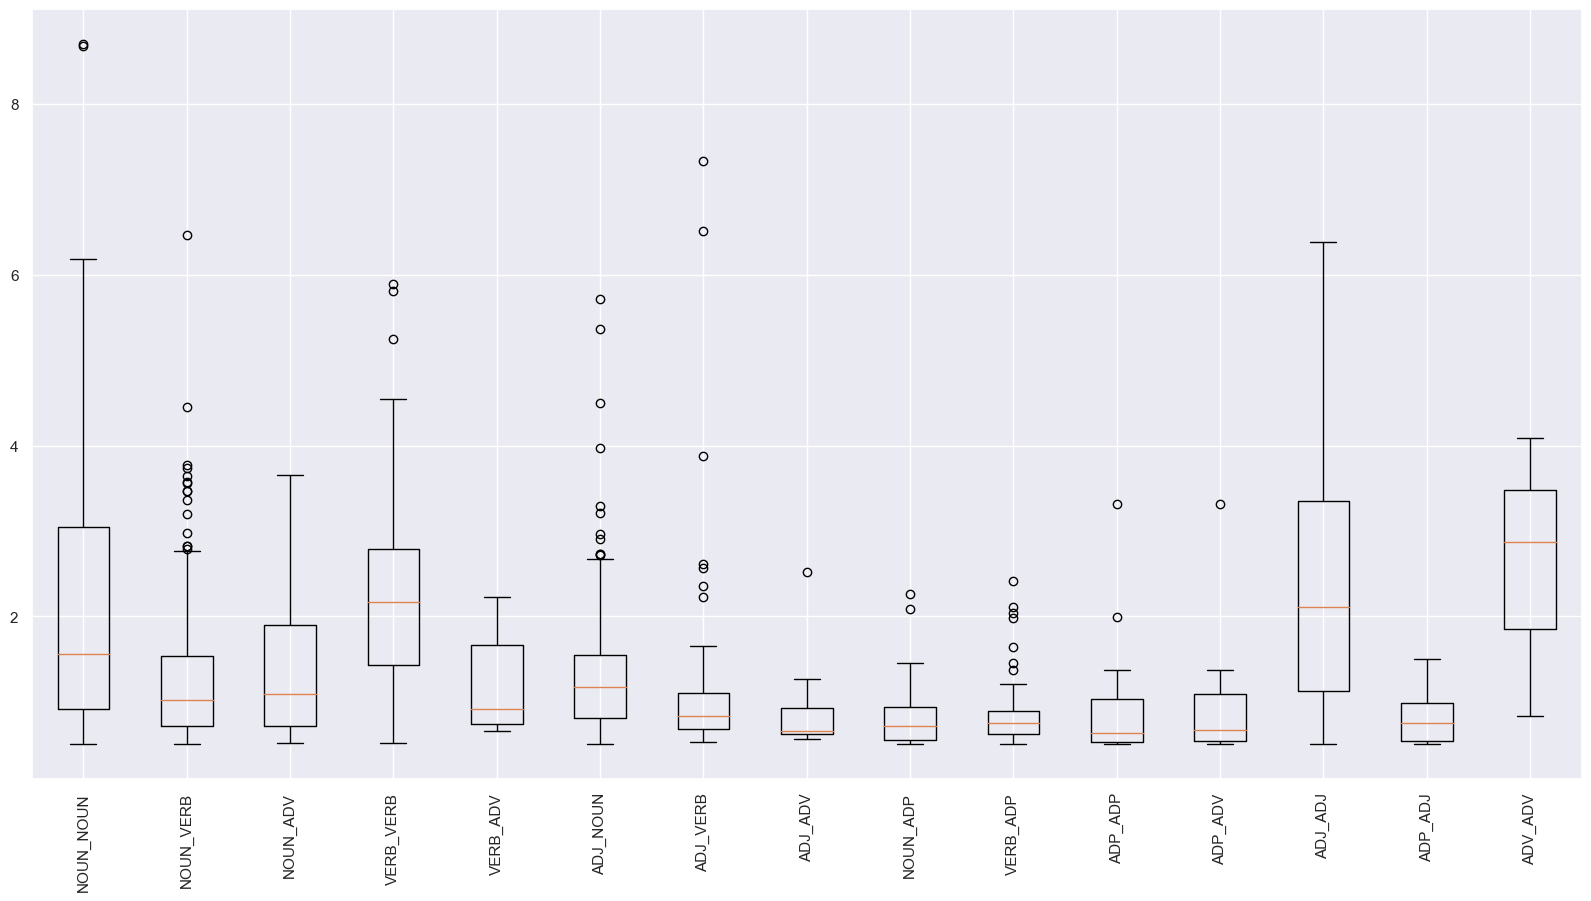

In [42]:
data_final0=[]

# or backwards compatable    
labels0, data0 = dict0.keys(), list(dict0.values())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0) + 1), labels0)
plt.show()

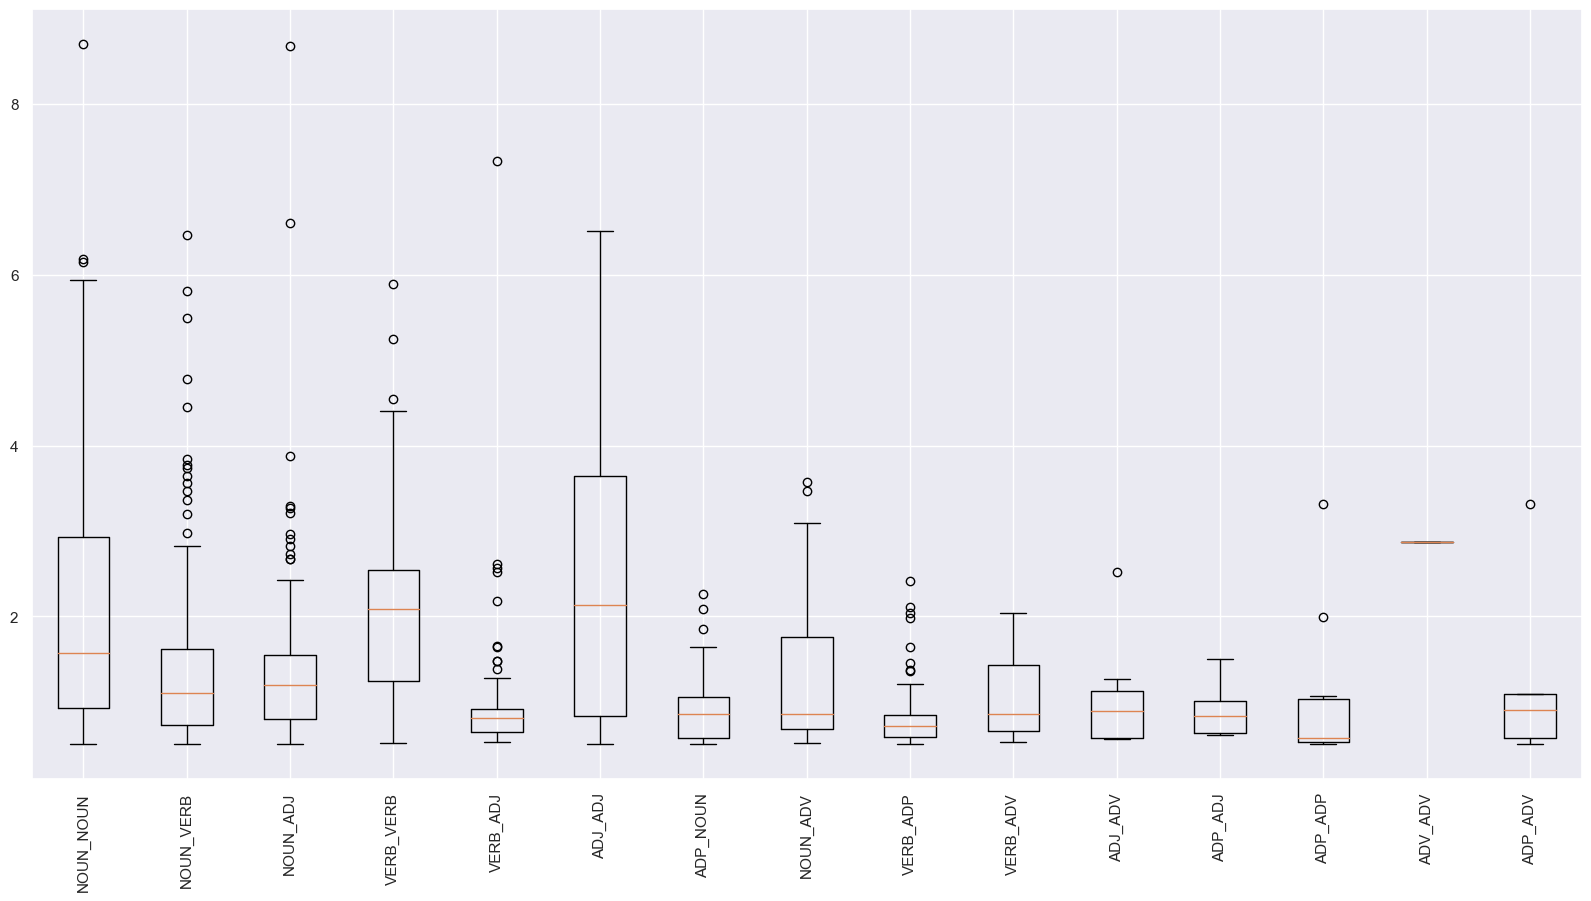

In [43]:
data_final1=[]
# or backwards compatable    
labels1, data1 = dict1.keys(), list(dict1.values())
for i in range(len(data1)):
    floats = [float(x) for x in data1[i]]
    data_final1.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1) + 1), labels1)
plt.show()

# Procesar los dataframe de forma global por muestreo y compararlos con target_prediction de acuerdo a los tipos de palabras que se alinearon

In [44]:
df_global=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [45]:
from itertools import chain
from collections import defaultdict

In [46]:
new_data = {'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
temp=df_global.copy()
for gp in muestreos:
    for f in tp:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf) & (temp['grupo']==gp)]
            dt_b = defaultdict(list)
            for index2,strings2 in temp2.iterrows():
                dt=strings2['datos']
                for k, v in chain(dt.items()):
                    dt_b[k].append(v)
            new_data['grupo'].append(gp)
            new_data['datos'].append(dt_b)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot_global=pd.DataFrame(new_data)
data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [47]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [48]:
data_boxplot_global

grupo                                              datos  \
0    0.05  {'NOUN_NOUN': [['1.3034014', '2.2022123', '0.7...   
1    0.05  {'NOUN_NOUN': [['5.517257', '1.5078784', '1.26...   
2    0.05  {'NOUN_NOUN': [['2.2022123', '2.0380602', '0.8...   
3    0.05  {'NOUN_NOUN': [['2.2239423', '2.4260612', '3.1...   
4    0.05  {'NOUN_NOUN': [['4.5691986', '3.595644', '0.88...   
..    ...                                                ...   
121     1  {'NOUN_NOUN': [['0.9227327', '1.5710056', '0.8...   
122     1  {'NOUN_NOUN': [['1.0580877', '1.2593389', '0.6...   
123     1  {'NOUN_NOUN': [['0.75073254', '2.241436', '2.2...   
124     1  {'NOUN_NOUN': [['1.4358273', '2.5496688', '0.6...   
125     1  {'NOUN_NOUN': [['4.0551147', '5.322295', '3.37...   

                     etiqueta  paraphrase  
0       entailment_entailment           0  
1       entailment_entailment           1  
2             neutral_neutral           0  
3             neutral_neutral           1  
4    contradiction_entailment           0  
..                        ...         ...  
121     neutral_contradiction           1  
122        neutral_entailment           0  
123        neutral_entailment           1  
124  entailment_contradiction           0  
125  entailment_contradiction           1  

[126 rows x 4 columns]

In [49]:
dict0_g=data_boxplot_global['datos'][0]
dict1_g=data_boxplot_global['datos'][1]
dict2_g=data_boxplot_global['datos'][2]
dict3_g=data_boxplot_global['datos'][3]
dict4_g=data_boxplot_global['datos'][4]
dict5_g=data_boxplot_global['datos'][5]

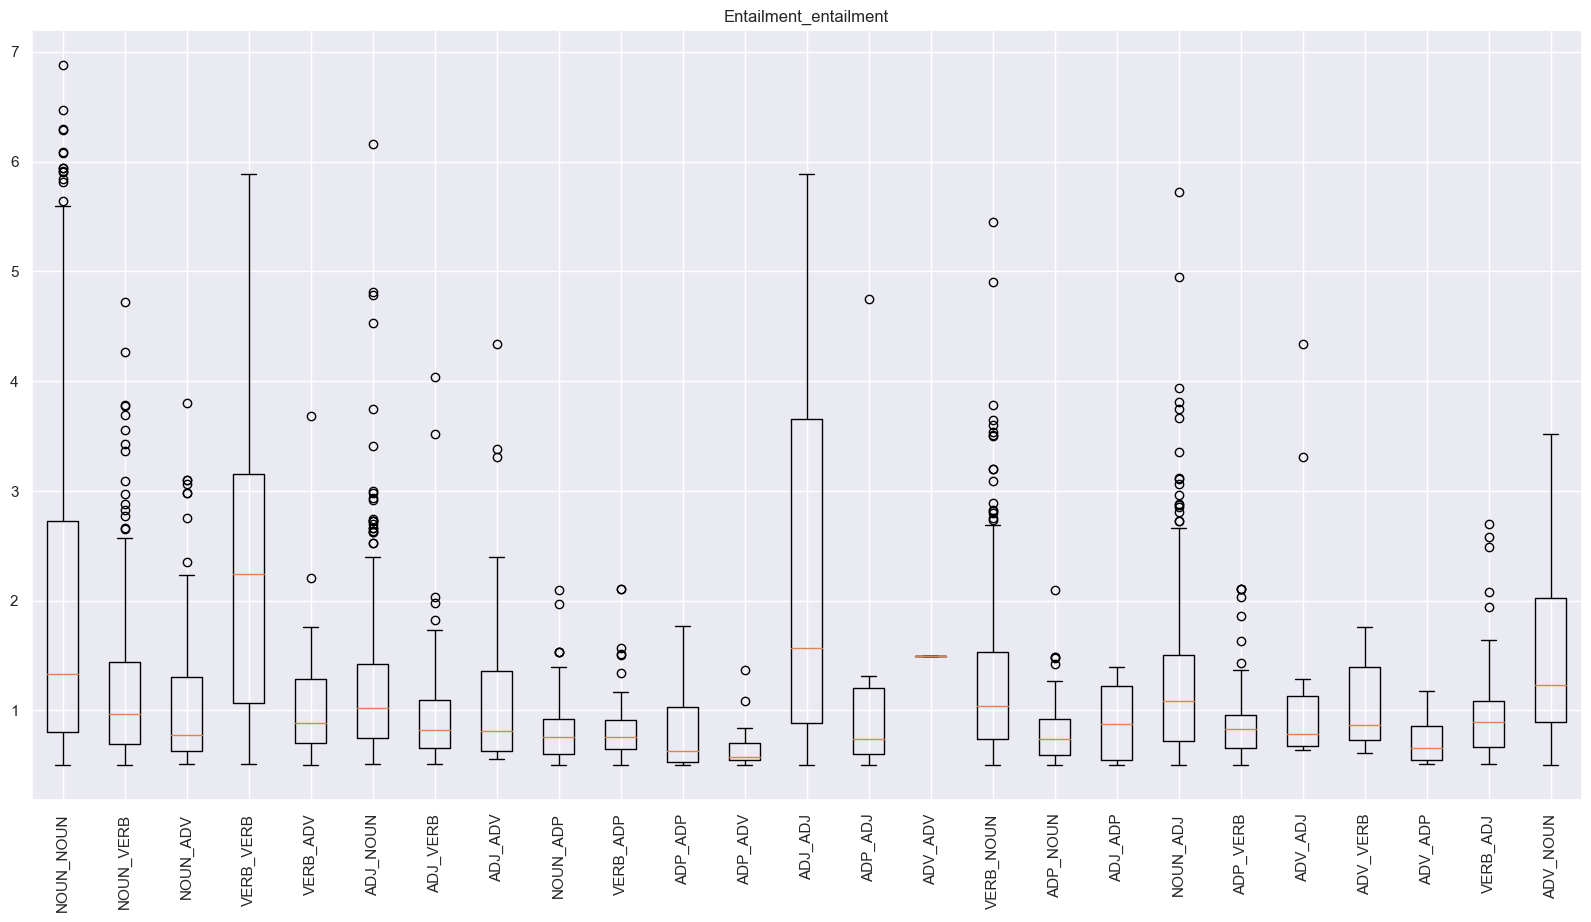

In [50]:
data_final0g=[]

# or backwards compatable    
labels0g, data0g = dict0_g.keys(), list(dict0_g.values())
for i in range(len(data0g)):
    for j in range(len(data0g[i])):
        floats = [float(x) for x in data0g[i][j]]
    data_final0g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0g) + 1), labels0g)
plt.title("Entailment_entailment")
plt.show()

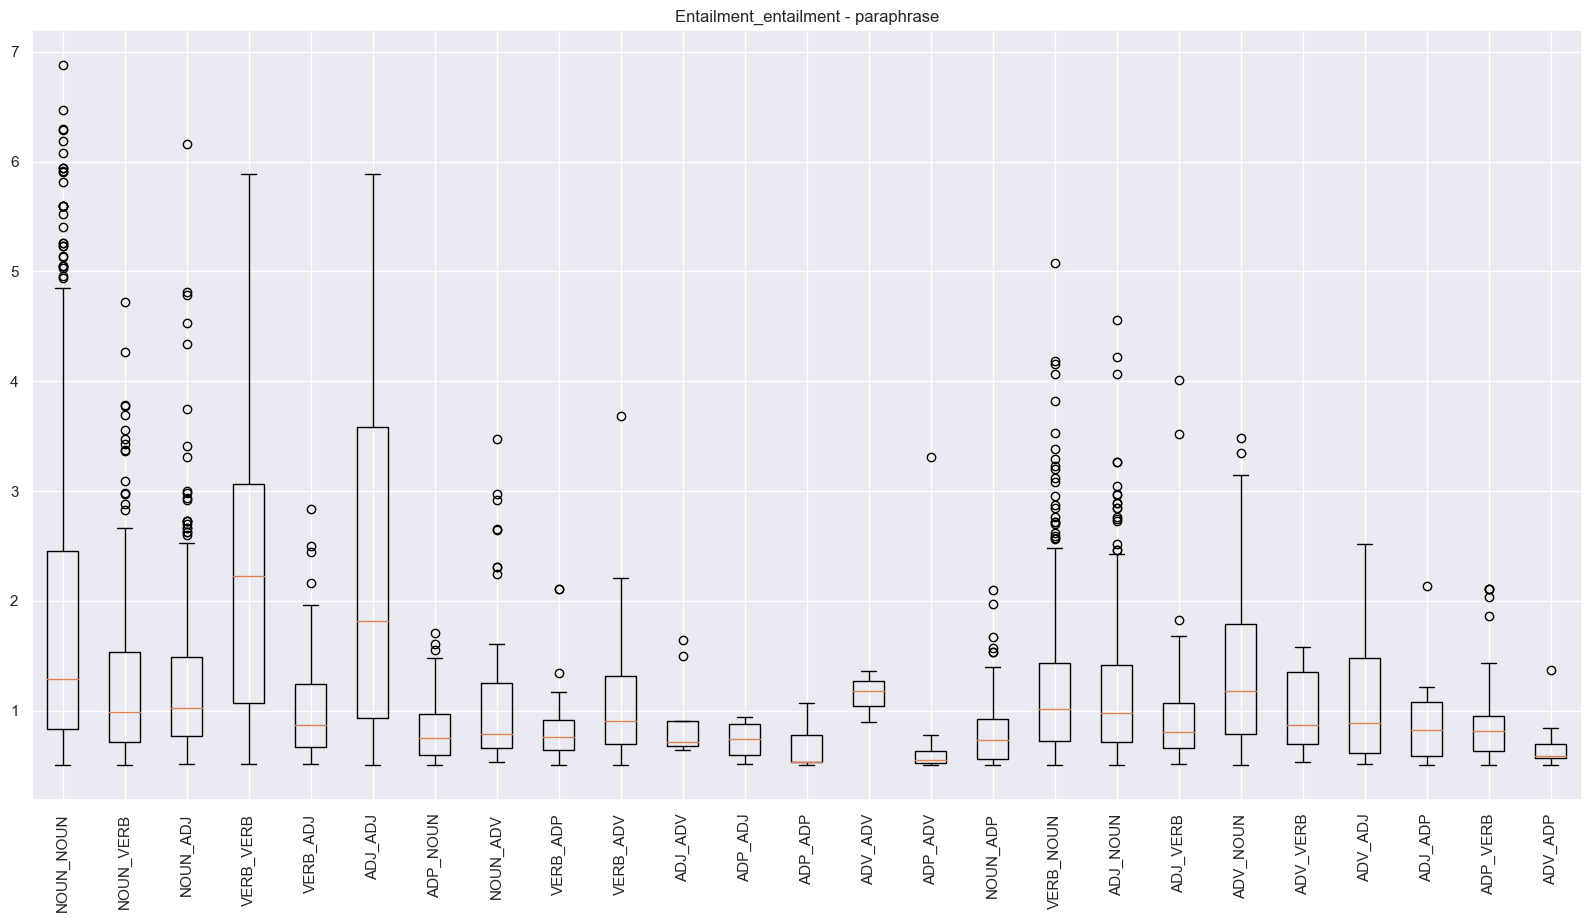

In [51]:
data_final1g=[]

# or backwards compatable    
labels1g, data1g = dict1_g.keys(), list(dict1_g.values())
for i in range(len(data1g)):
    for j in range(len(data1g[i])):
        floats = [float(x) for x in data1g[i][j]]
    data_final1g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1g) + 1), labels1g)
plt.title("Entailment_entailment - paraphrase")
plt.show()

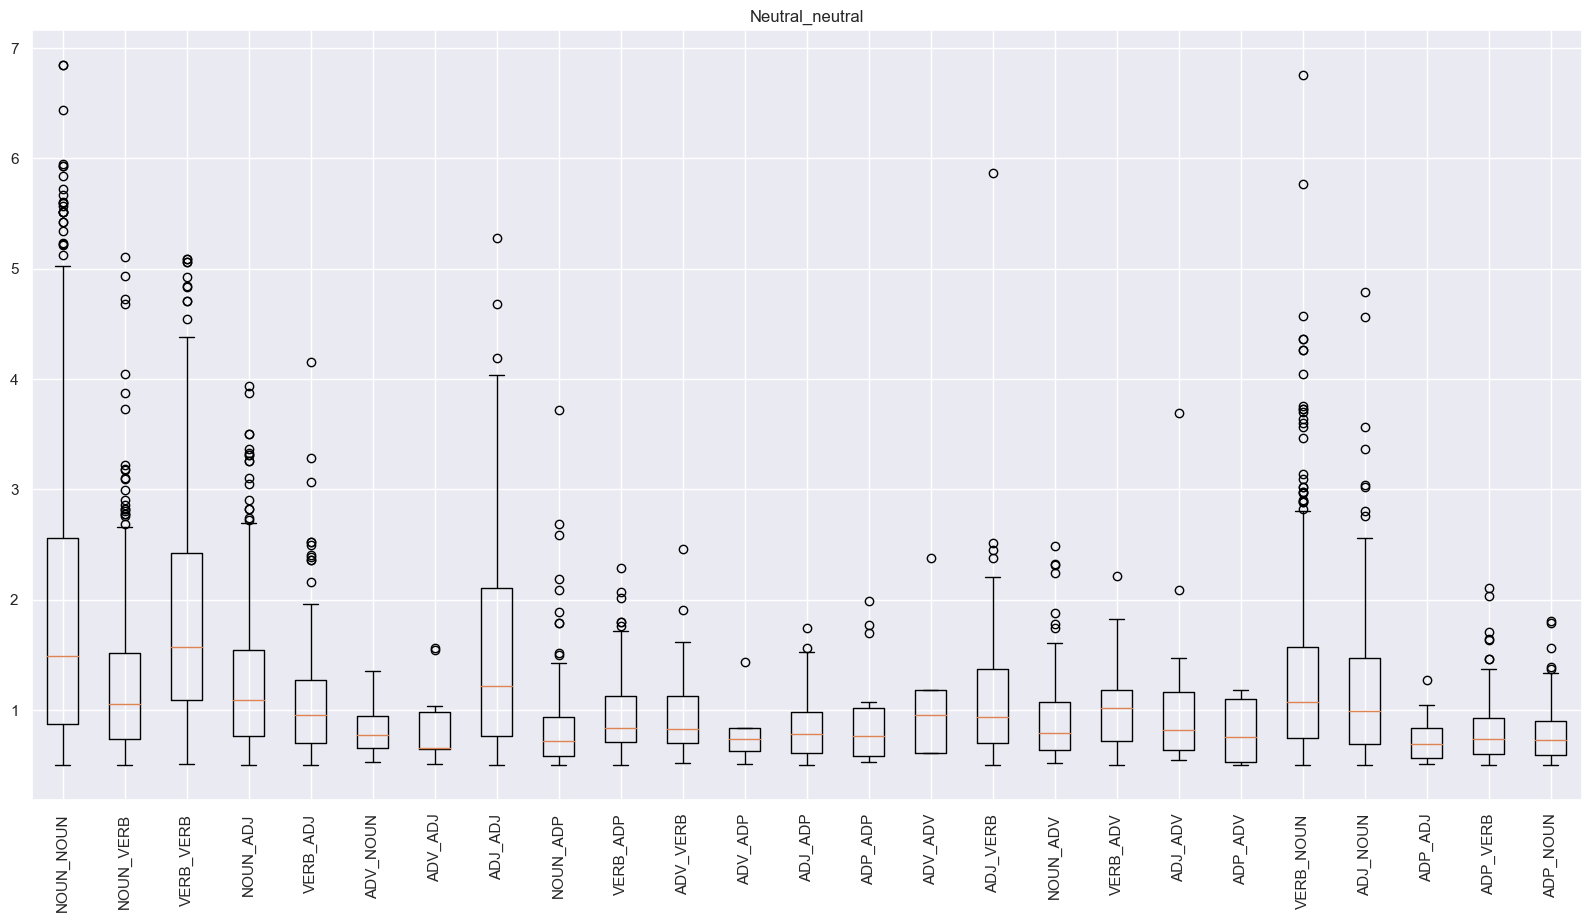

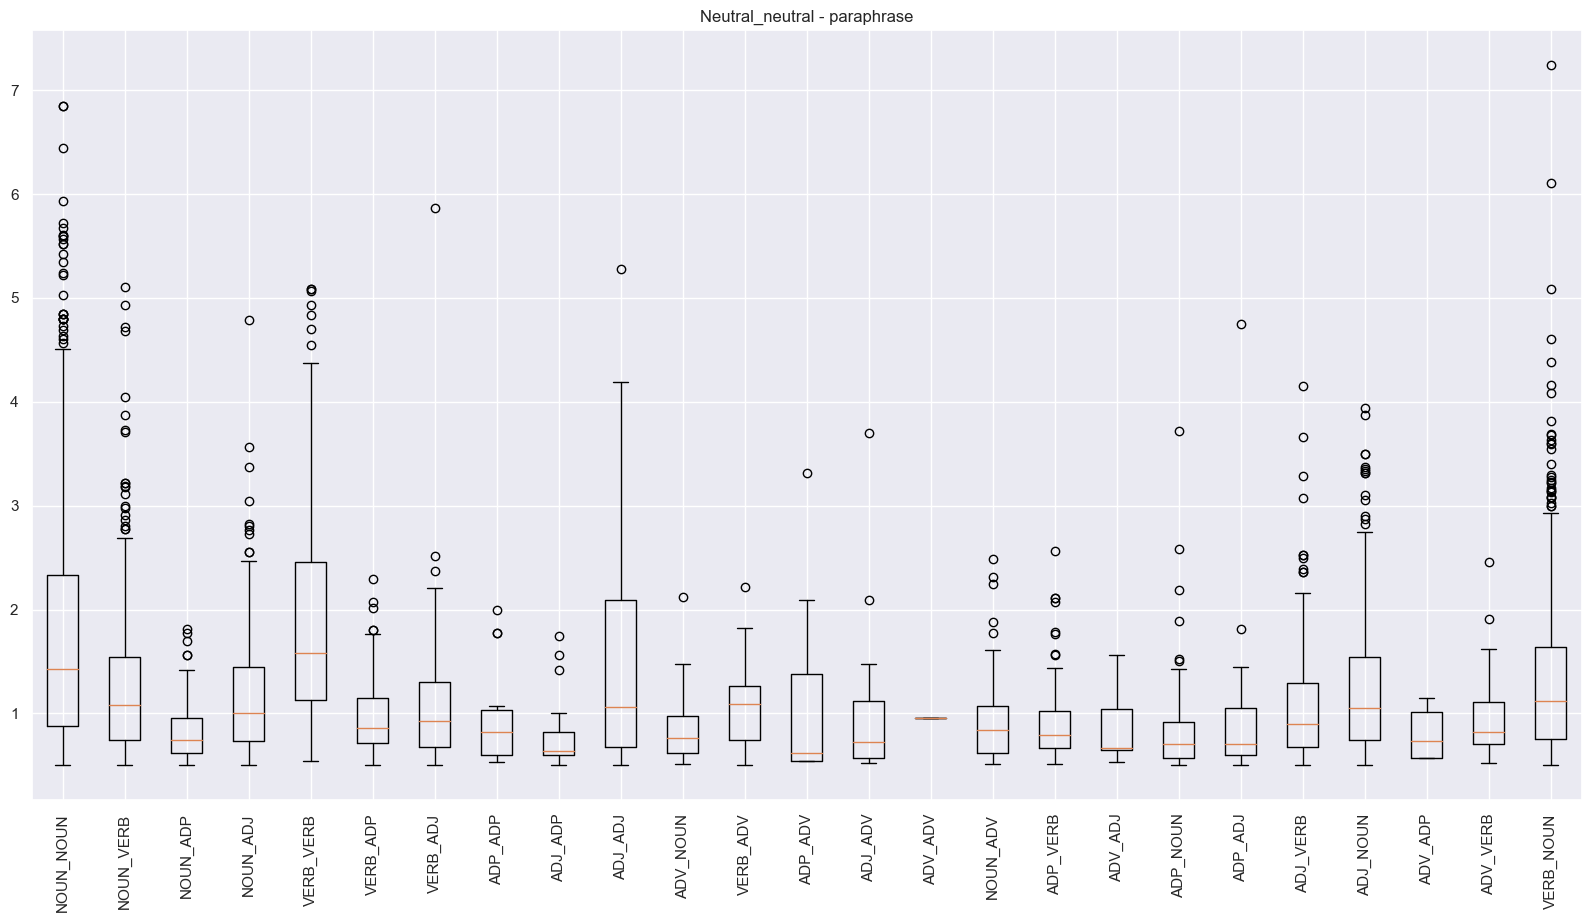

In [52]:
data_final2g=[]

# or backwards compatable    
labels2g, data2g = dict2_g.keys(), list(dict2_g.values())
for i in range(len(data2g)):
    for j in range(len(data2g[i])):
        floats = [float(x) for x in data2g[i][j]]
    data_final2g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final2g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels2g) + 1), labels2g)
plt.title("Neutral_neutral")
plt.show()

data_final3g=[]

# or backwards compatable    
labels3g, data3g = dict3_g.keys(), list(dict3_g.values())
for i in range(len(data3g)):
    for j in range(len(data3g[i])):
        floats = [float(x) for x in data3g[i][j]]
    data_final3g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final3g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels3g) + 1), labels3g)
plt.title("Neutral_neutral - paraphrase")
plt.show()

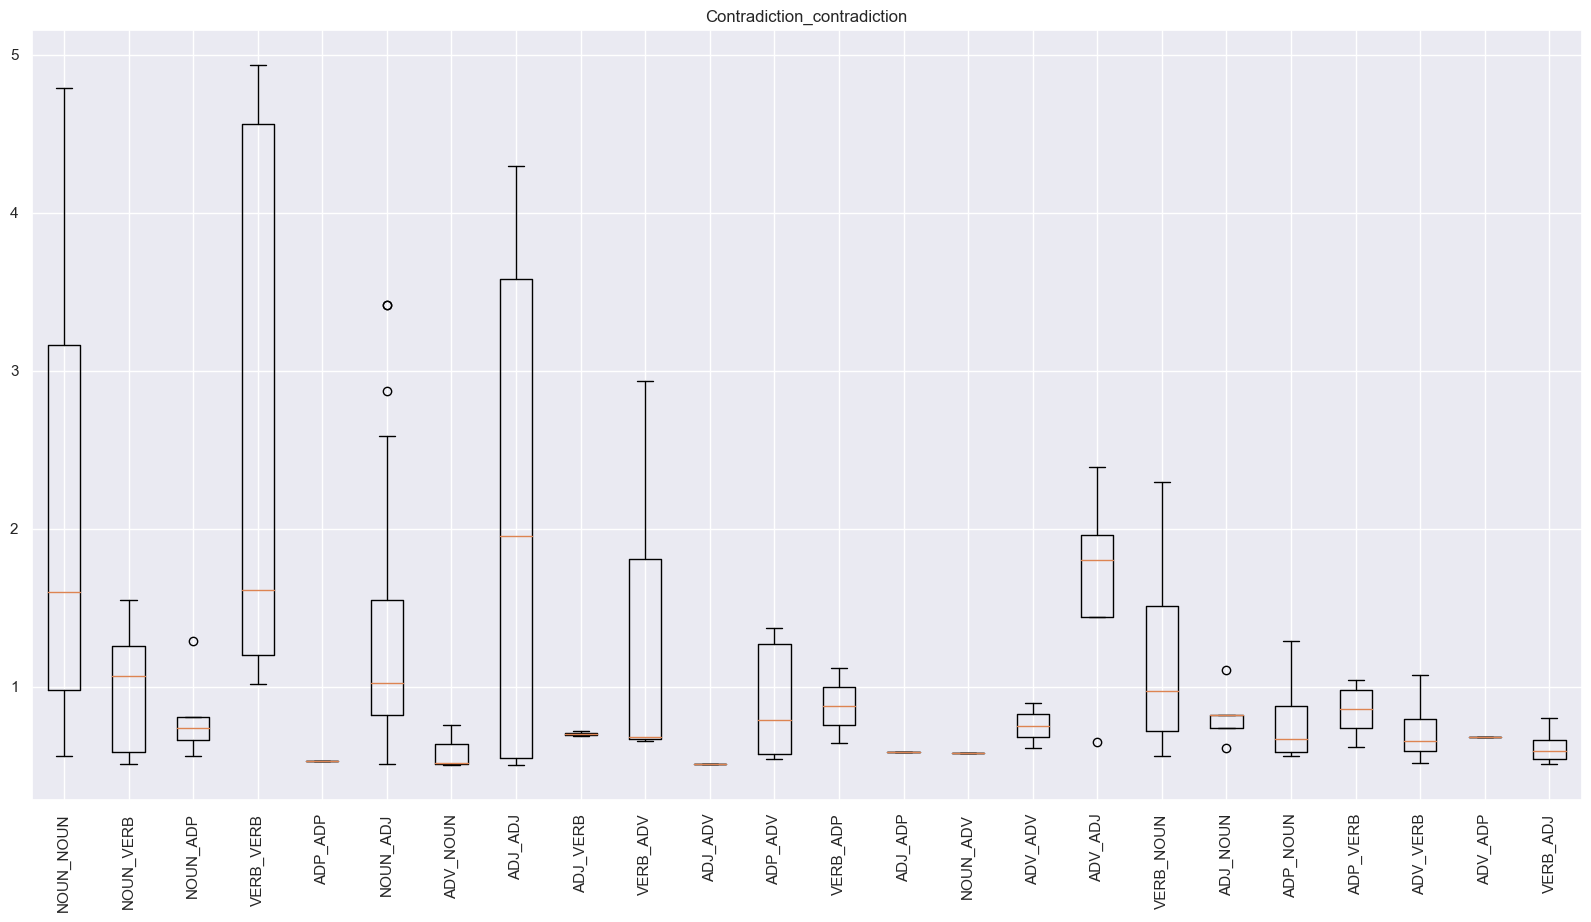

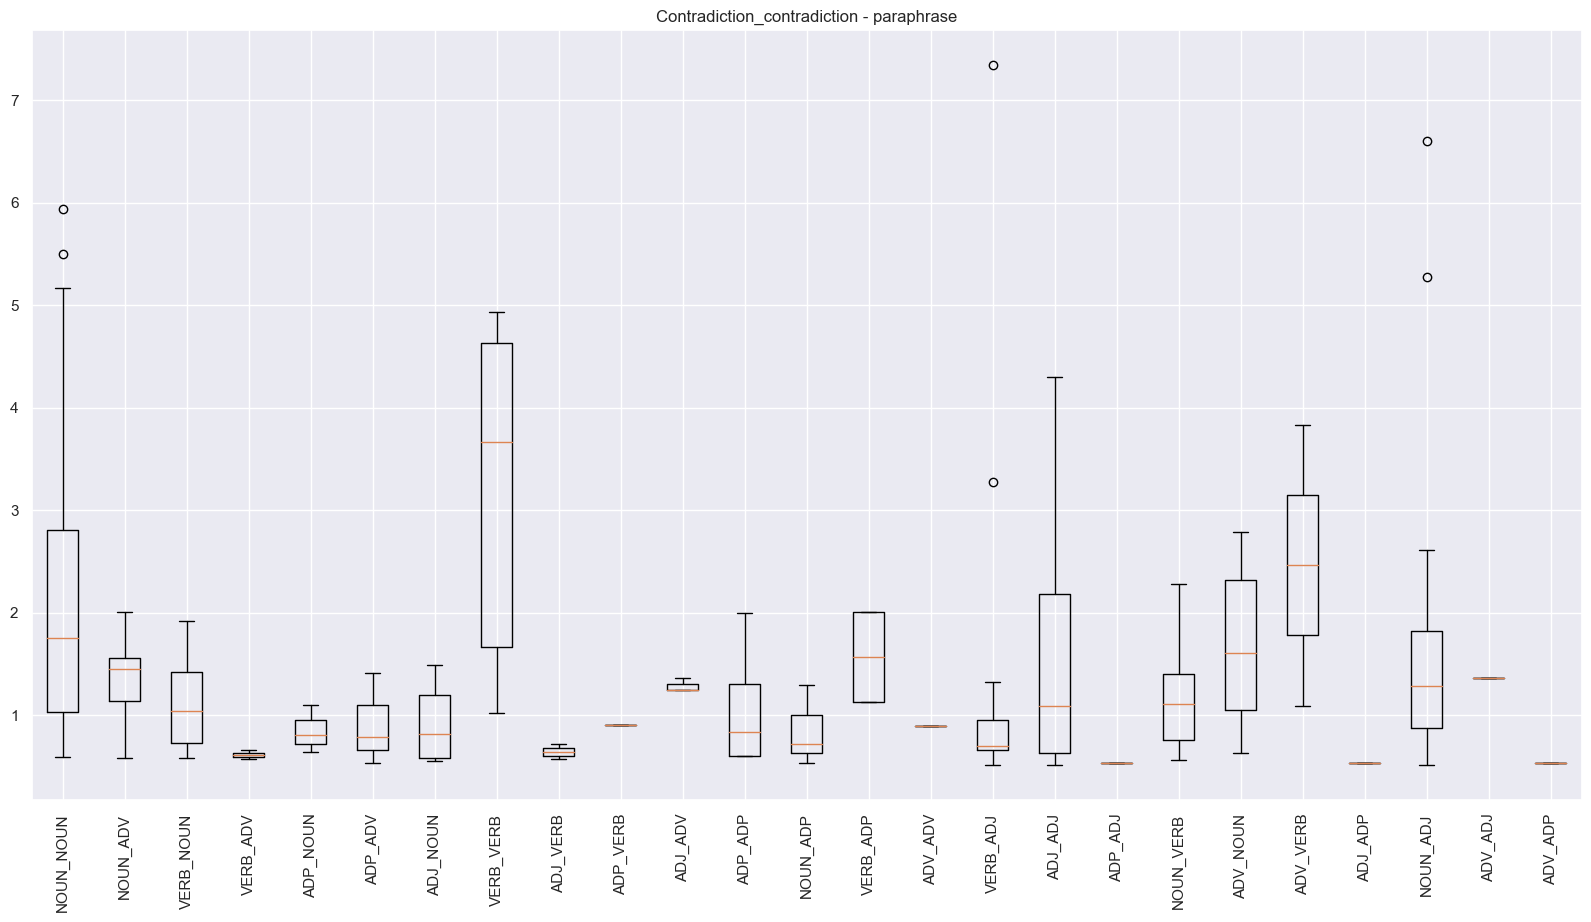

In [53]:
data_final4g=[]

# or backwards compatable    
labels4g, data4g = dict4_g.keys(), list(dict4_g.values())
for i in range(len(data4g)):
    for j in range(len(data4g[i])):
        floats = [float(x) for x in data4g[i][j]]
    data_final4g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final4g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels4g) + 1), labels4g)
plt.title("Contradiction_contradiction")
plt.show()

data_final5g=[]

# or backwards compatable    
labels5g, data5g = dict5_g.keys(), list(dict5_g.values())
for i in range(len(data5g)):
    for j in range(len(data5g[i])):
        floats = [float(x) for x in data5g[i][j]]
    data_final5g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final5g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels5g) + 1), labels5g)
plt.title("Contradiction_contradiction - paraphrase")
plt.show()

# vamos a crear los mapas de calor con conteos de los valores por tipo de palabras que tienen un alineamiento mayor al umbral

In [54]:
data_boxplot_global

grupo                                              datos  \
0    0.05  {'NOUN_NOUN': [['1.3034014', '2.2022123', '0.7...   
1    0.05  {'NOUN_NOUN': [['5.517257', '1.5078784', '1.26...   
2    0.05  {'NOUN_NOUN': [['2.2022123', '2.0380602', '0.8...   
3    0.05  {'NOUN_NOUN': [['2.2239423', '2.4260612', '3.1...   
4    0.05  {'NOUN_NOUN': [['4.5691986', '3.595644', '0.88...   
..    ...                                                ...   
121     1  {'NOUN_NOUN': [['0.9227327', '1.5710056', '0.8...   
122     1  {'NOUN_NOUN': [['1.0580877', '1.2593389', '0.6...   
123     1  {'NOUN_NOUN': [['0.75073254', '2.241436', '2.2...   
124     1  {'NOUN_NOUN': [['1.4358273', '2.5496688', '0.6...   
125     1  {'NOUN_NOUN': [['4.0551147', '5.322295', '3.37...   

                     etiqueta  paraphrase  
0       entailment_entailment           0  
1       entailment_entailment           1  
2             neutral_neutral           0  
3             neutral_neutral           1  
4    contradiction_entailment           0  
..                        ...         ...  
121     neutral_contradiction           1  
122        neutral_entailment           0  
123        neutral_entailment           1  
124  entailment_contradiction           0  
125  entailment_contradiction           1  

[126 rows x 4 columns]

# Generar los mapas de calor por muestreo

In [55]:
lista_mapas=[]
lista_nombres=[]

In [56]:
for index, strings in data_boxplot_global.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        p_df.at[indice,columna]=len(v)
    lista_mapas.append(p_df.copy())
    lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

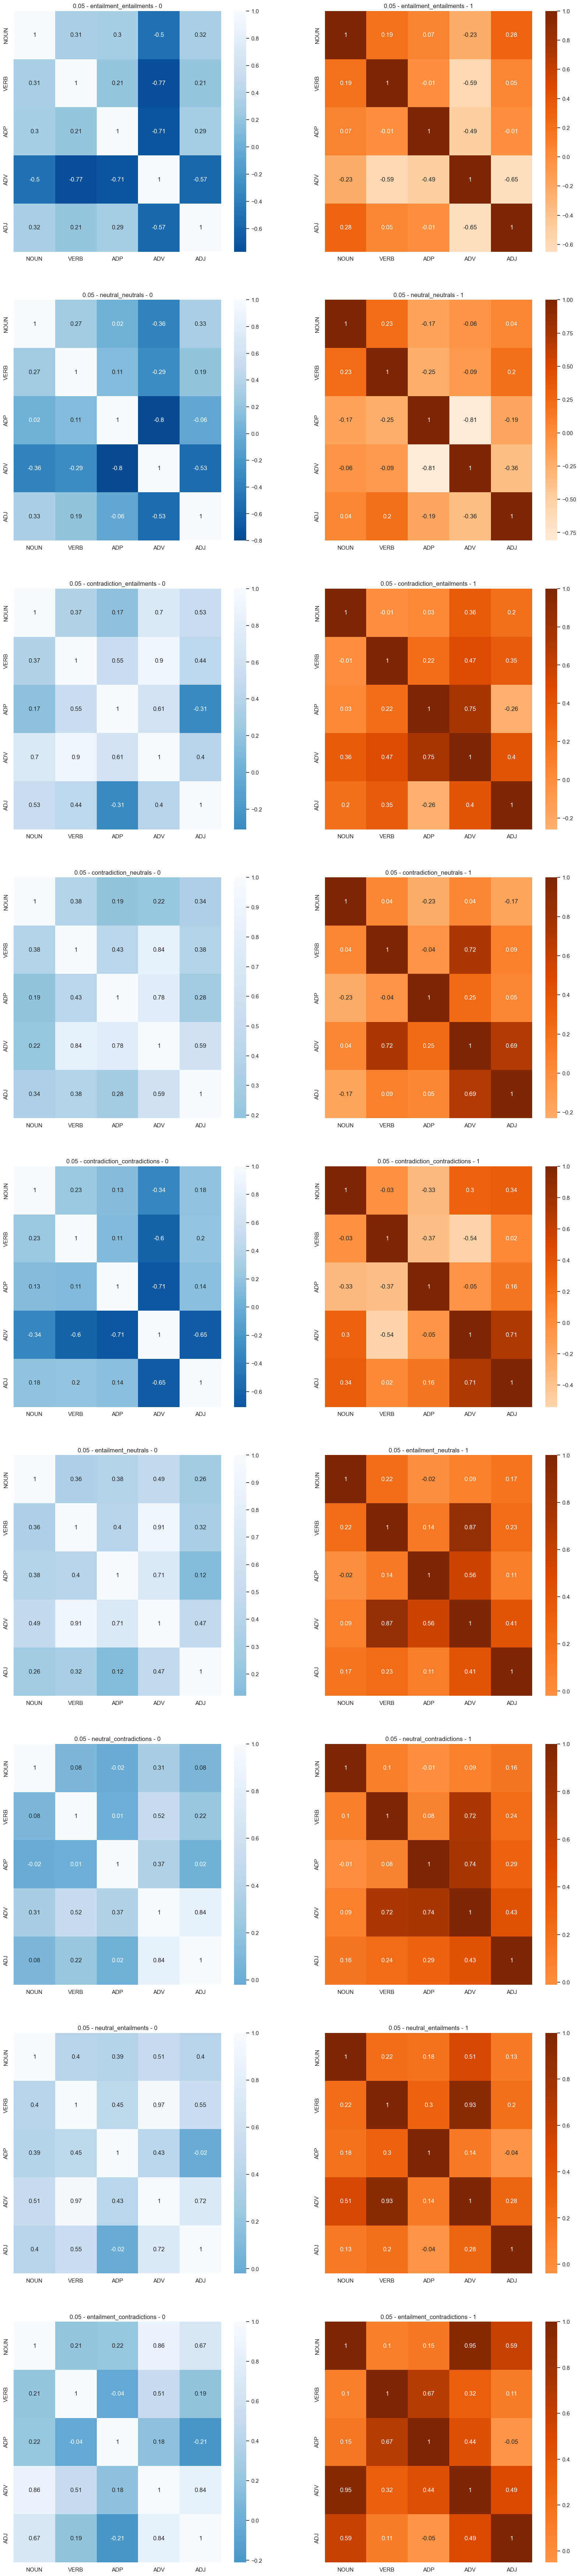

In [57]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i].corr().round(2), center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1].corr().round(2), center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [58]:
print(lista_mapas[2].corr().round(2))
print(lista_nombres[2])

      NOUN  VERB   ADP   ADV   ADJ
NOUN  1.00  0.27  0.02 -0.36  0.33
VERB  0.27  1.00  0.11 -0.29  0.19
ADP   0.02  0.11  1.00 -0.80 -0.06
ADV  -0.36 -0.29 -0.80  1.00 -0.53
ADJ   0.33  0.19 -0.06 -0.53  1.00
0.05 - neutral_neutrals - 0


<AxesSubplot:>

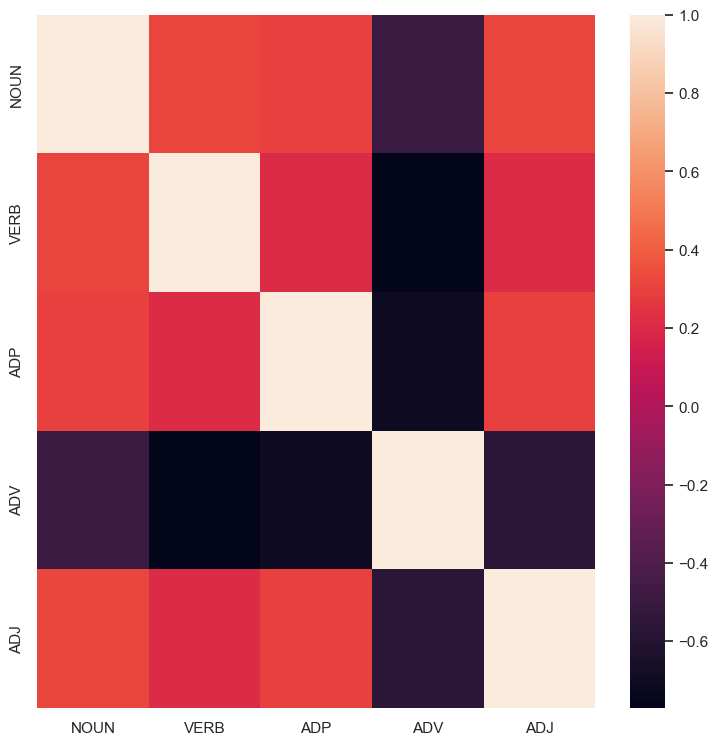

In [59]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[0].corr().round(2))

<AxesSubplot:>

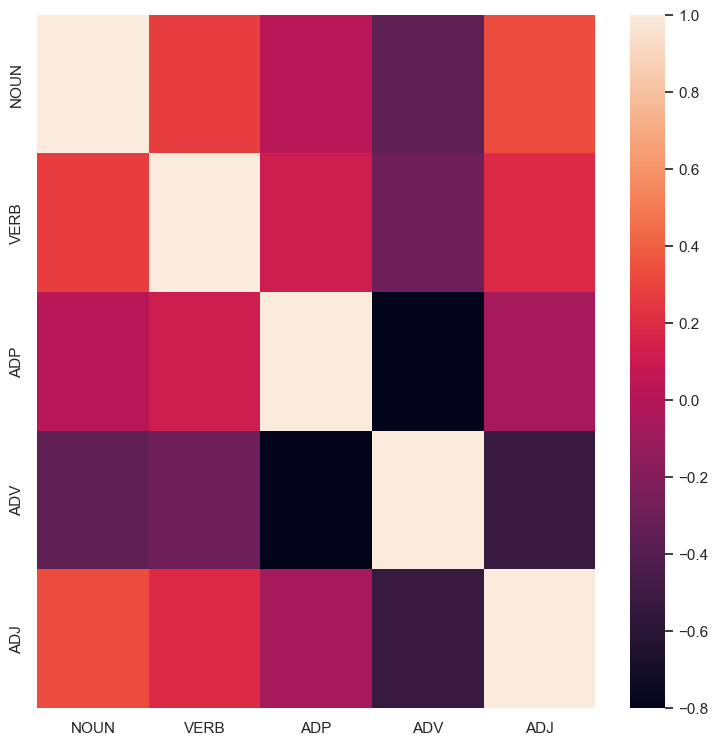

In [60]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[2].corr().round(2))

In [61]:
import stat

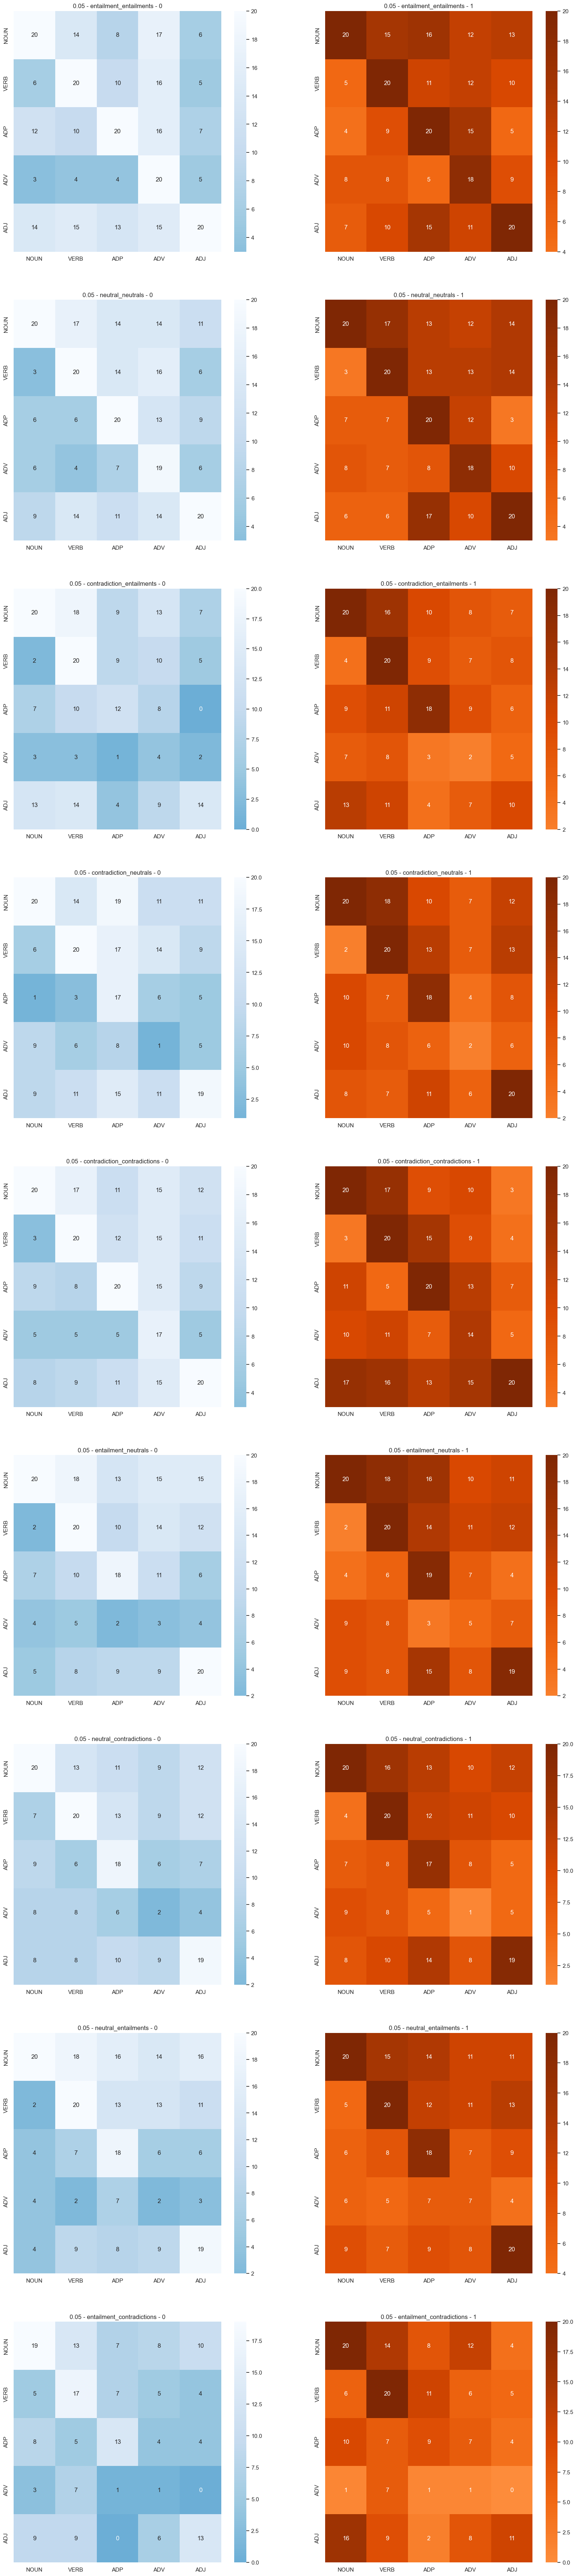

In [62]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

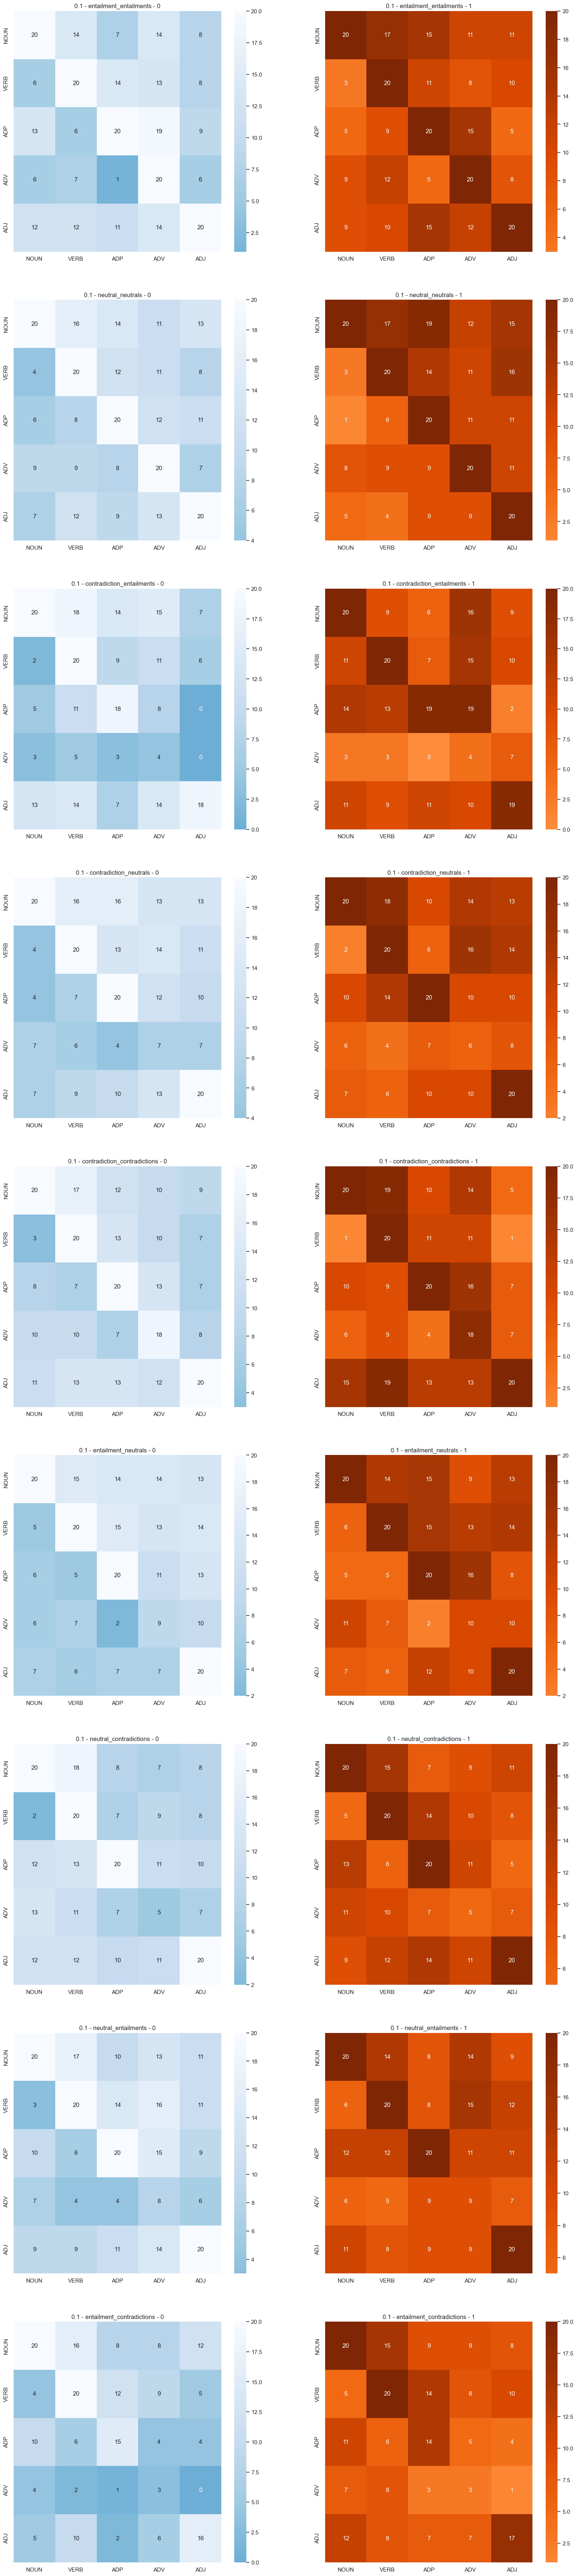

In [63]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(18,36,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

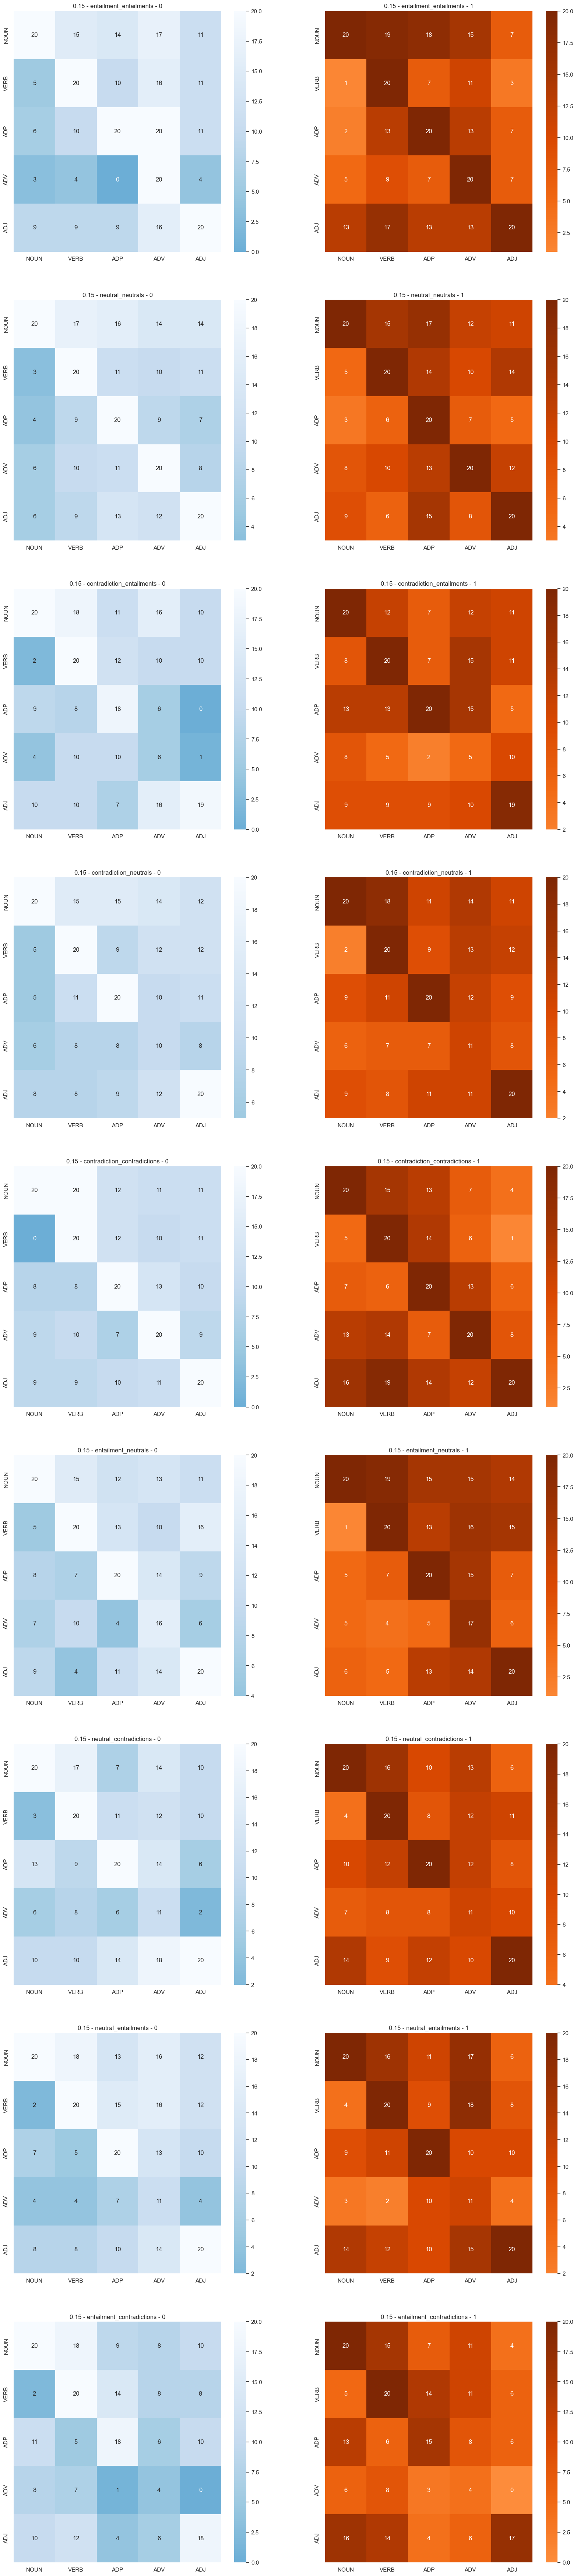

In [64]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(36,54,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

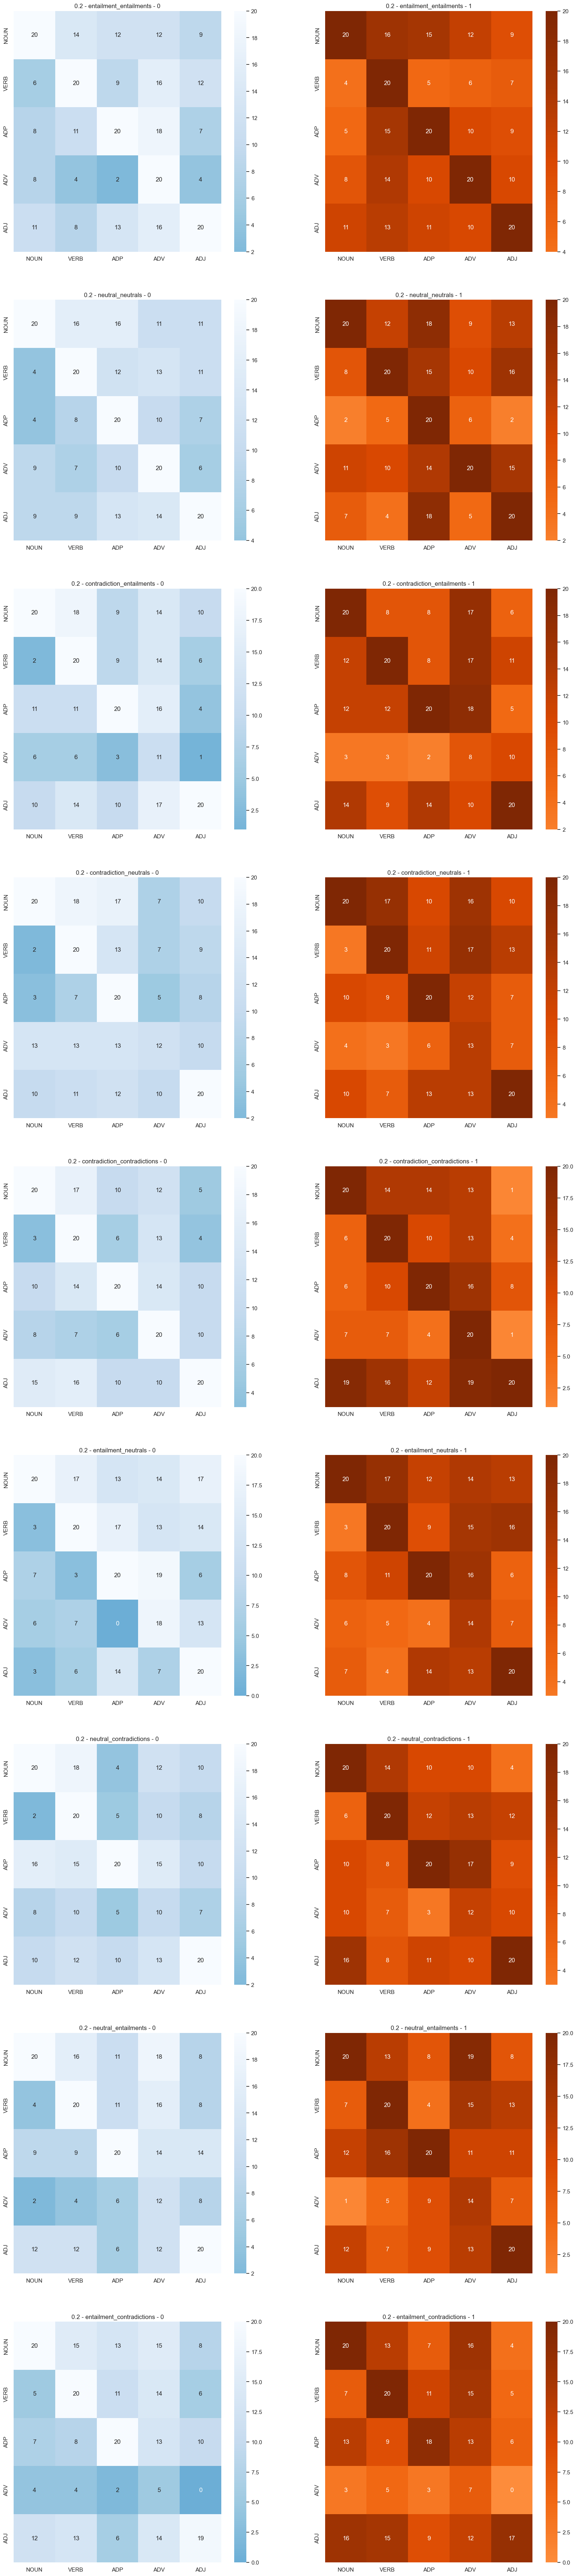

In [65]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(54,72,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

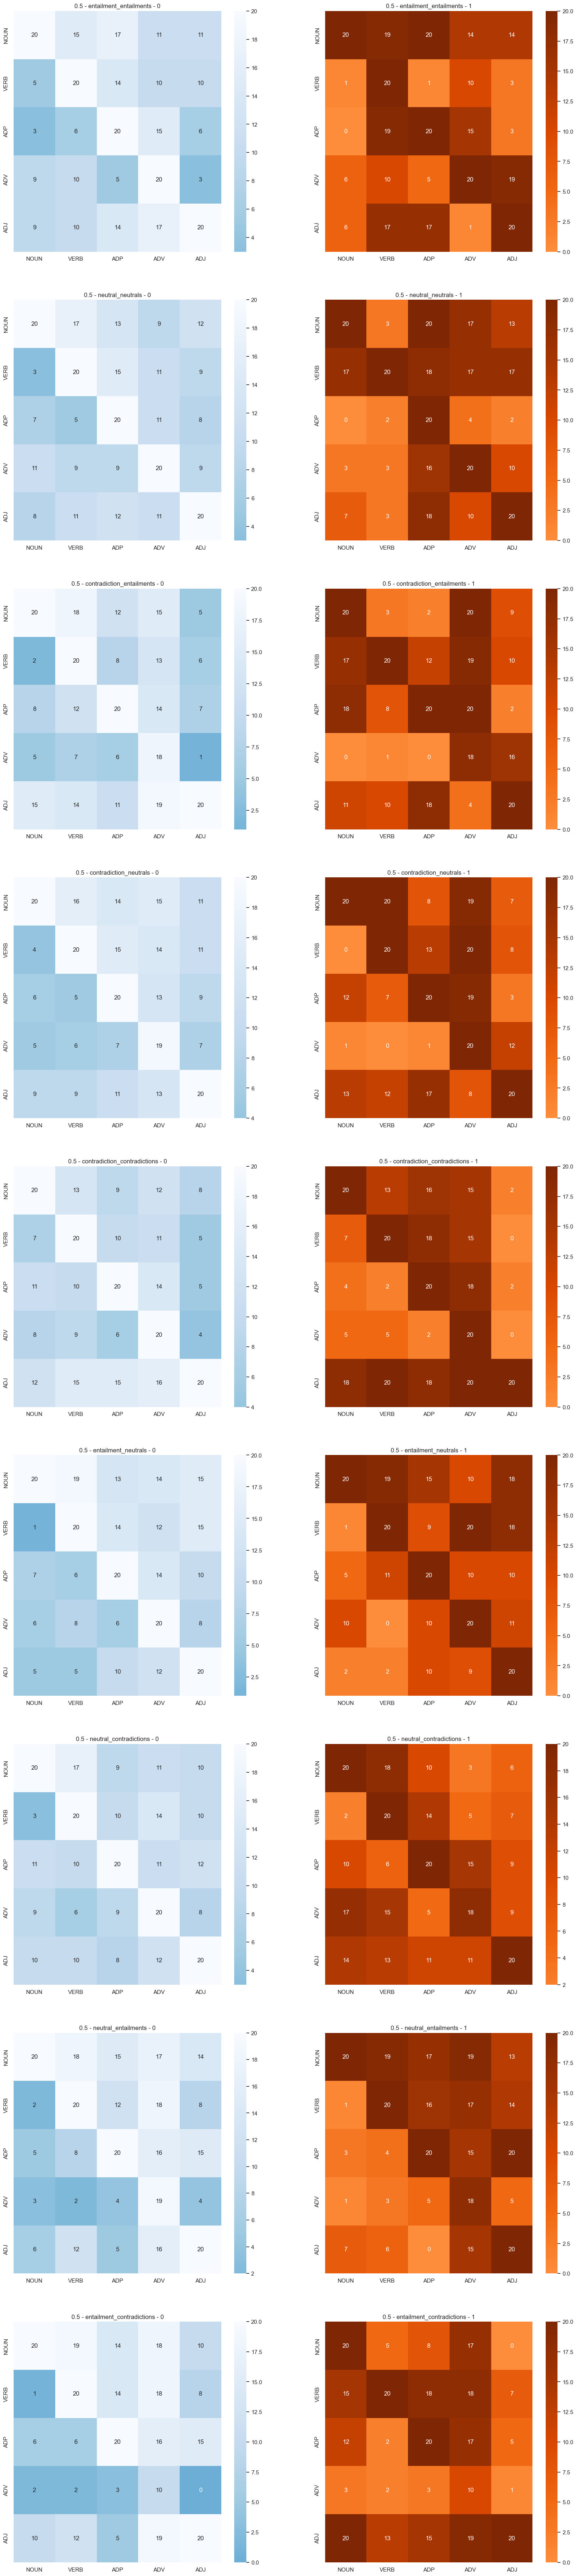

In [66]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(72,90,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

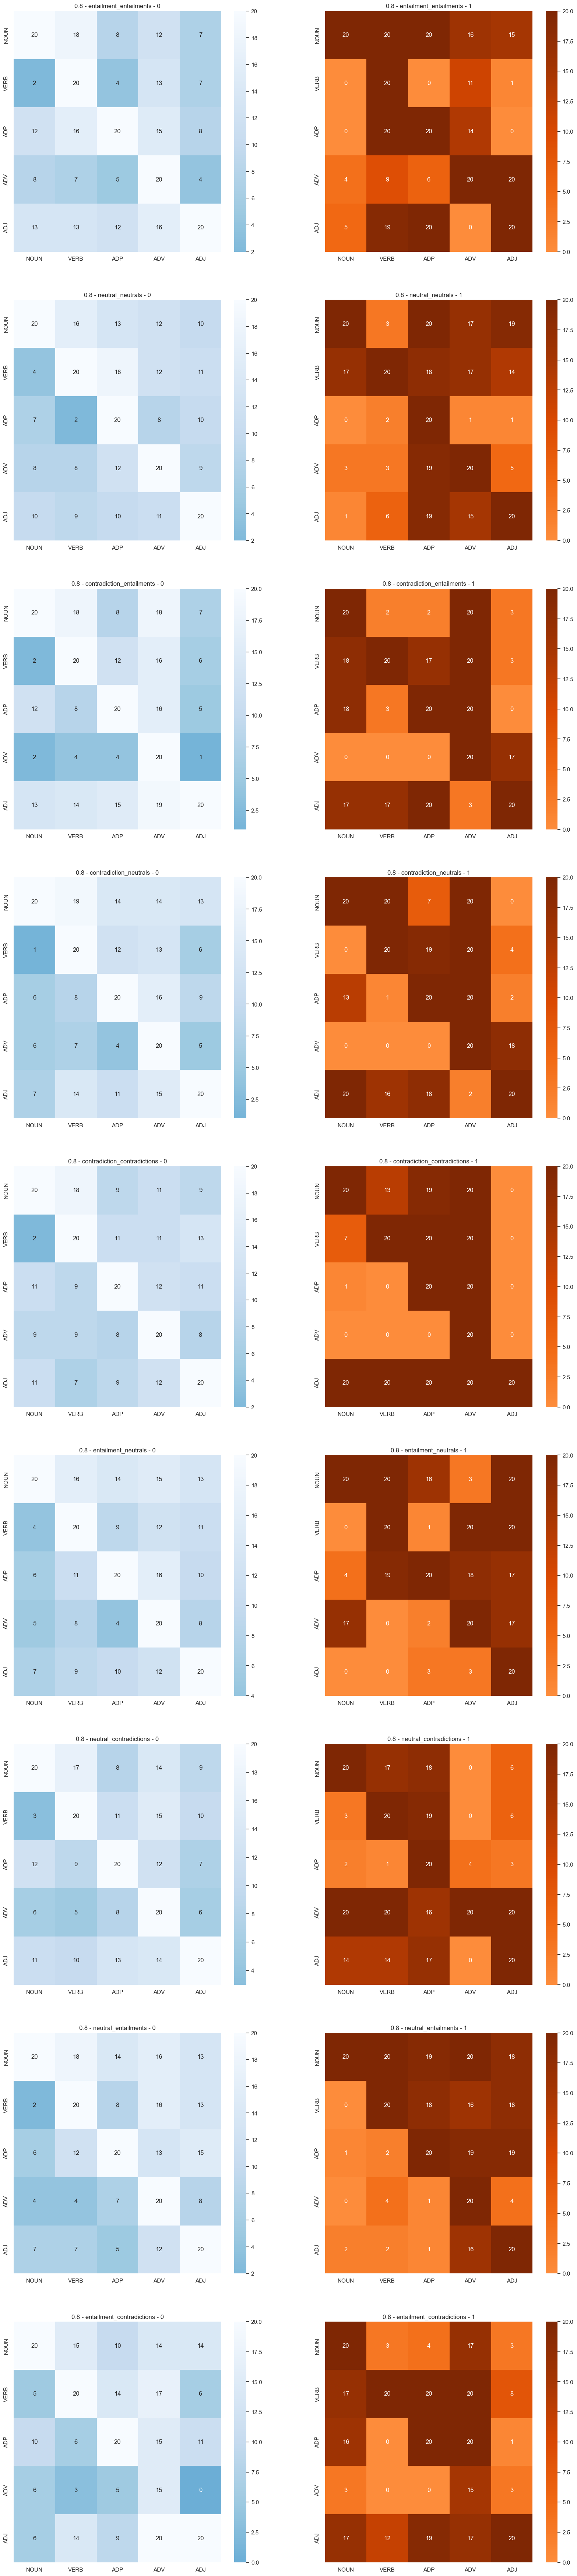

In [67]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(90,108,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

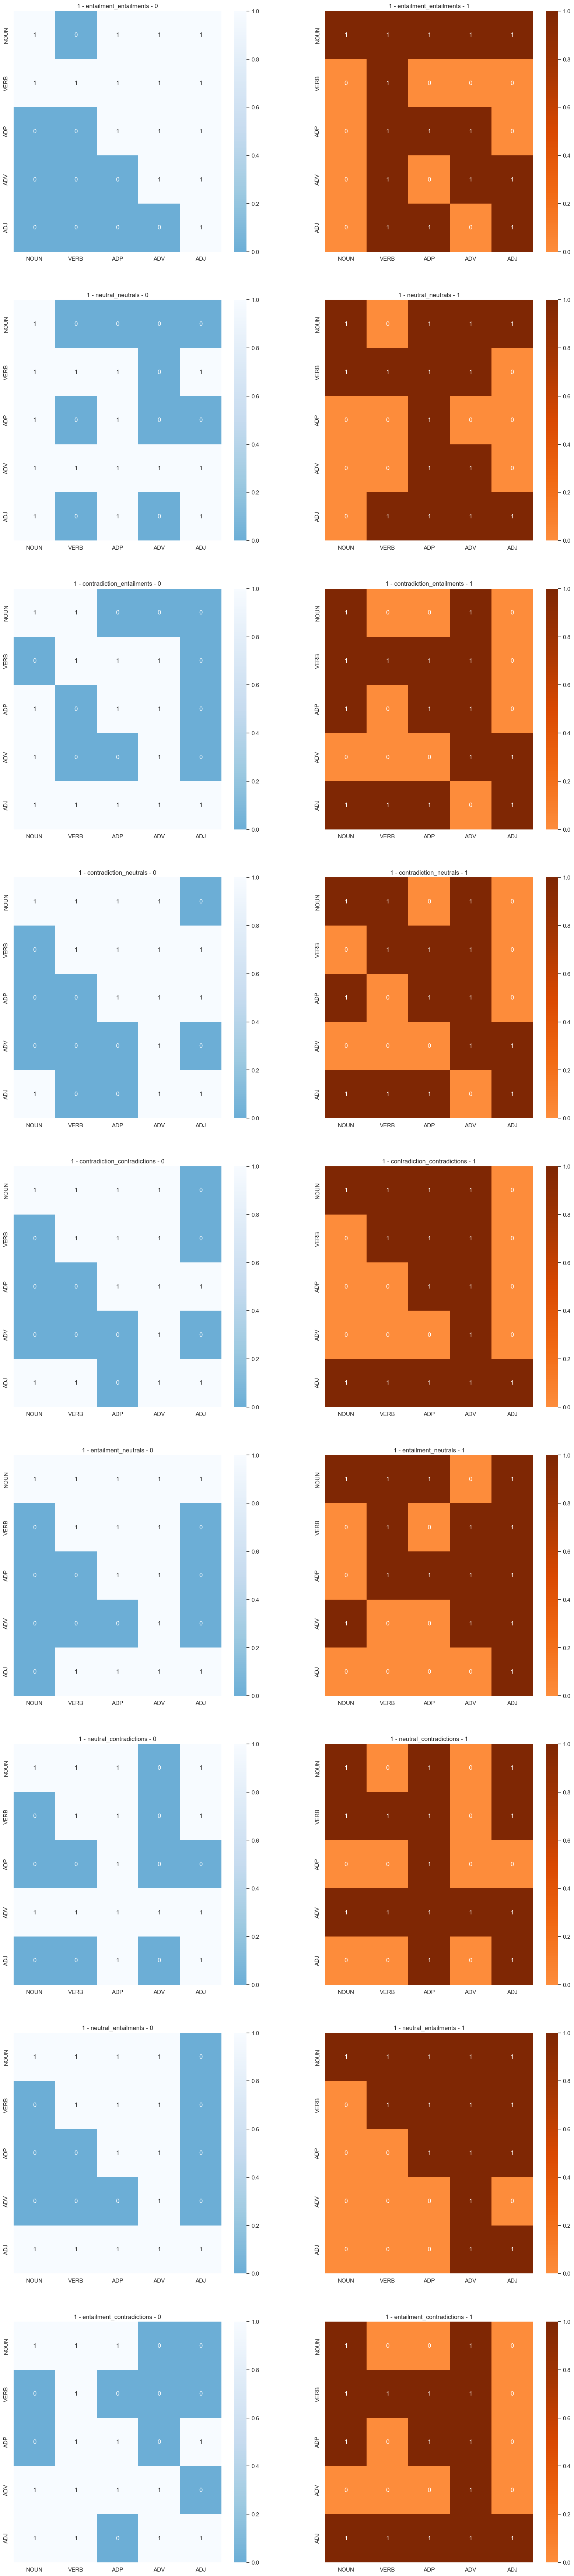

In [68]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(108,126,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [69]:
lista_mapas[108]

NOUN  VERB  ADP  ADV  ADJ
NOUN     1     0    1    1    1
VERB     1     1    1    1    1
ADP      0     0    1    1    1
ADV      0     0    0    1    1
ADJ      0     0    0    0    1